In [1]:
# from methods import OA_SA, VA_SA
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from utils.plot_results import plot, plot_mean_rewards, plot_curves
import pandas as pd

from copy import deepcopy

In [60]:
file = 'results/rewards_Q.npy'
rs = np.load(file)
rs = np.concatenate([
    np.zeros((1, 100)),
    rs,
], 0)
print(len(rs))

file = 'results/rewards_Q_heterogenous.npy'

rs_heter = np.load(file)
rs_heter = np.concatenate([
    np.zeros((1, 100)),
    rs_heter,
], 0)
print(len(rs_heter[0]))

10
100


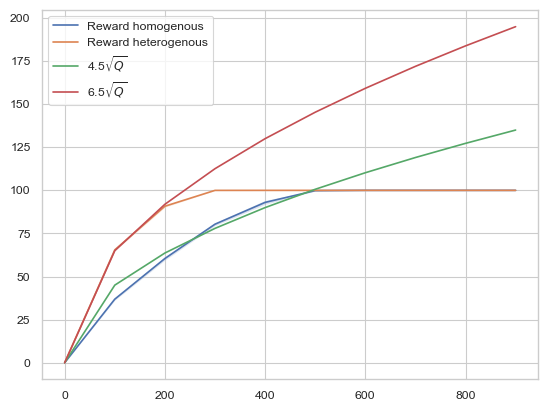

In [65]:
steps = 100
x = steps*np.arange(len(rs))
plot_curves(rs, 'Reward homogenous', 100)
plot_curves(rs_heter, 'Reward heterogenous', 100)
    
coeff = 4.5
plt.plot(x, coeff*np.sqrt(x), label = str(coeff)+r'$\sqrt{Q}$')
coeff = 6.5
plt.plot(x, coeff*np.sqrt(x), label = str(coeff)+r'$\sqrt{Q}$')
plt.legend()
# plt.plot(50*np.arange(len(rs)), 50*np.arange(len(rs)))

## Begins

In [2]:

# env_configs = {
#         "K" : 50,
#         "Q" : 100, 
#         "DoD" : 0.5,
#         "vehicle_capacity" : 25,
#         "re_optimization" : False,
#         "costs_KM" : [1, 1], 
#         "emissions_KM" : [.1, .3]
#     }

# env_configs = {
#             "K" : 50,
#             "Q" : 70, 
#             "DoD" : 0.7,
#             "vehicle_capacity" : 25,
#             "re_optimization" : True,
#             "costs_KM" : [1, 1],
#             "emissions_KM" : [.1, .3],
#             "n_scenarios" : 500
#         }

In [3]:

# file = "res_wReOpt_500"
# file = "res_TSP"
# file = "res_TSP_fullDyn_100"
file = "res_TSP_fullDyn_100"
with open(f'results/{file}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/res_SL.pkl', "rb") as f:
    res_SL = pickle.load(f)
    
with open(f'results/{file}/res_RL_DQN.pkl', "rb") as f:
    res_RL = pickle.load(f)
    
# with open(f'results/{file}/res_RL_DQN_equiProb.pkl', "rb") as f:
#     res_RL_equiProb = pickle.load(f)
    
# with open(f'results/{file}/res_RL_PPO.pkl', "rb") as f:
#     res_RL_PPO = pickle.load(f)

with open(f'results/{file}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)

with open(f'results/{file}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
    

data = {
    "Offline" : res_offline['rs'],
    "MSA" : res_MSA['rs'],
    "Greedy" : res_greedy['rs'],
    "DQN" : res_RL['rs'],
    "SL" : res_SL['rs'],
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
}
    
    

In [4]:
df = pd.DataFrame(data)
df

,Offline,MSA,Greedy,DQN,SL,Random
0,29.0,27.0,24.0,30.0,25.0,21.0
1,29.0,23.0,24.0,30.0,30.0,22.0
2,30.0,30.0,29.0,30.0,28.0,20.0
3,28.0,30.0,30.0,30.0,26.0,21.0
4,28.0,26.0,27.0,30.0,25.0,22.0
...,...,...,...,...,...,...
95,28.0,26.0,27.0,29.0,30.0,21.0
96,30.0,30.0,30.0,30.0,30.0,25.0
97,30.0,21.0,24.0,30.0,23.0,15.0
98,26.0,29.0,29.0,30.0,23.0,20.0


<Axes: >

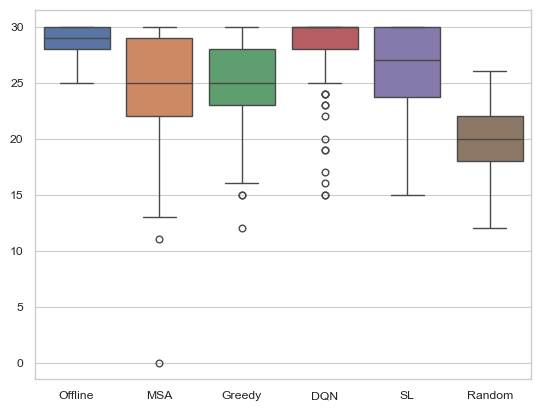

In [5]:
sns.boxplot(data=data)

In [6]:
env_configs

{'K': 50,
 'Q': 100,
 'DoD': 1.0,
 'vehicle_capacity': 30,
 're_optimization': False,
 'costs_KM': [1],
 'emissions_KM': [0.3],
 'n_scenarios': 100,
 'test': True}

In [7]:
data['Offline'].mean()

np.float64(28.87)

In [8]:
[data[k].mean() for k in data.keys()]

[np.float64(28.87),
 np.float64(24.6),
 np.float64(24.79),
 np.float64(28.17),
 np.float64(26.19),
 np.float64(19.78)]

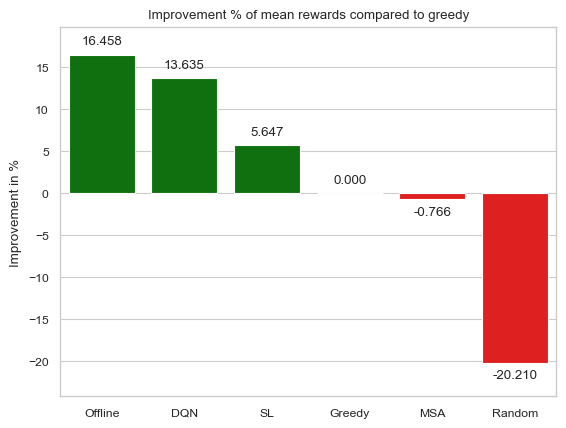

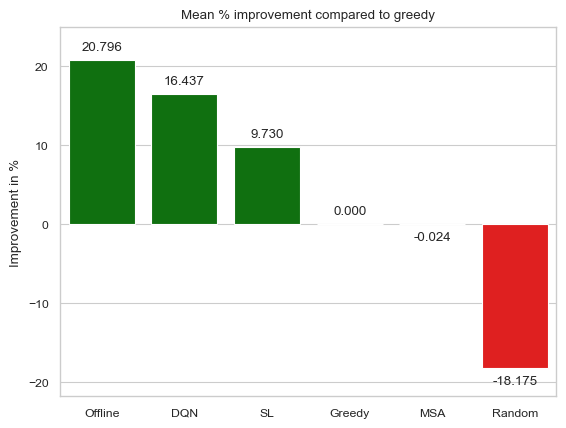

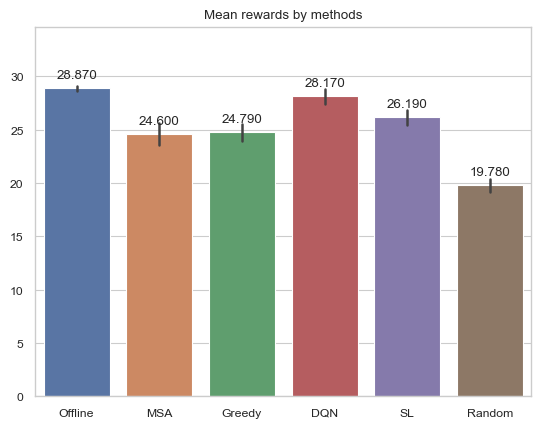

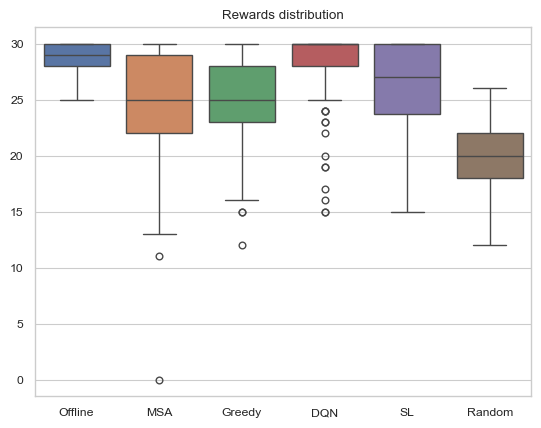

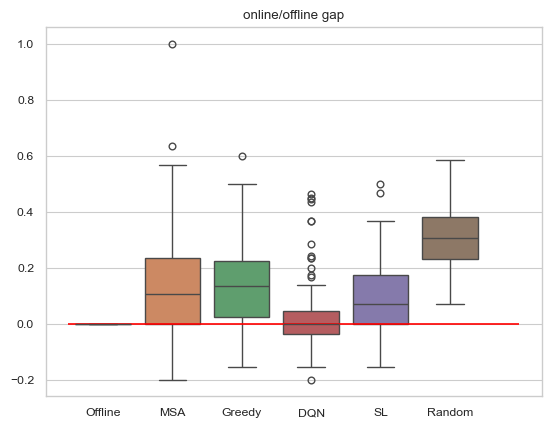

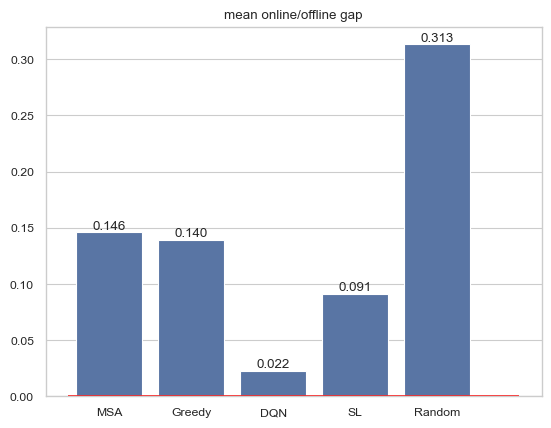

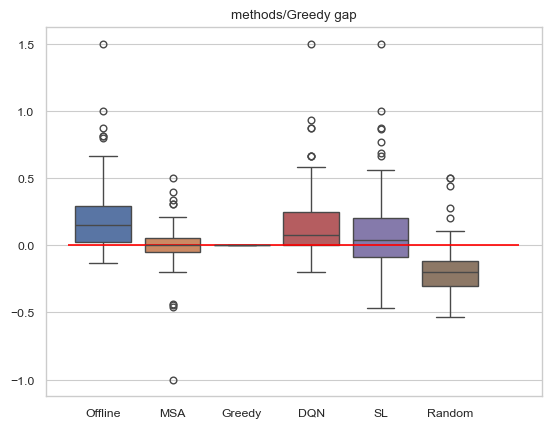

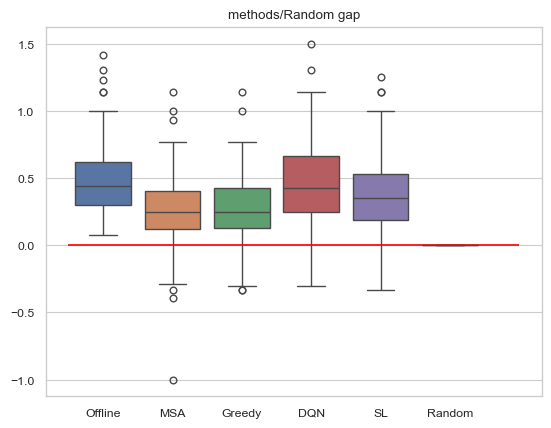

In [9]:
sns.color_palette("deep")
plot(data)

In [10]:
assert False

AssertionError: 

In [11]:
with open(f'results/res_TSP_fullDynamic/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
len(res_random["rs"])

500

In [12]:
df = pd.DataFrame(columns=["epoch", "rs"])
rs = np.load("results/dqn_rs.npy")
rs = np.concatenate(
    [res_random["rs"][None], rs],
    axis=0
)
df["rs"] = rs.flatten()
df["epoch"] = np.array([len(rs[i])*[i] for i in range(len(rs))]).flatten()
df

,epoch,rs
0,0,19.0
1,0,20.0
2,0,25.0
3,0,22.0
4,0,23.0
...,...,...
6495,12,17.0
6496,12,16.0
6497,12,30.0
6498,12,30.0


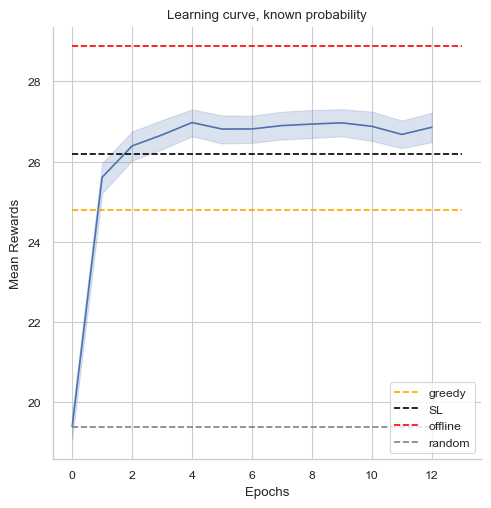

In [13]:
sns.relplot(
    data=df, kind="line",
    x="epoch", y="rs",
    errorbar=("ci", 95),
    # markers=True, dashes=False
)
plt.hlines(res_greedy["rs"].mean(), 0, len(rs), 'orange', label="greedy", linestyles='--')
plt.hlines(res_SL["rs"].mean(), 0, len(rs), 'black', label="SL", linestyles='--')
plt.hlines(res_offline["rs"].mean(), 0, len(rs), 'red', label="offline", linestyles='--')
plt.hlines(res_random["rs"].mean(), 0, len(rs), 'gray', label="random", linestyles='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Rewards')
plt.title('Learning curve, known probability')
plt.legend(loc='lower right')
plt.show()

## VRP 2 vehicles Full Dynamic Q = 100

### Plots

In [ ]:
import pickle

wo = 'woReOpt'
w = 'wReOpt'
# file = "res_woReOpt_500"
# file = "res_clusters_test"
file = "res_VRP_DoD100_Q100"

# file = "res_VRP_fullDyn"
# file = "res_wReOpt_500"
# file = "res_TSP"
# file = "res_TSP_fullDynamic"
with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)

with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/{w}/res_RL_DQN_OA.pkl', "rb") as f:
    res_RL = pickle.load(f)
    
with open(f'results/{file}/{w}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)

with open(f'results/{file}/{w}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
    
    
with open(f'results/{file}/{wo}/res_greedy.pkl', "rb") as f:
    res_greedy_wo = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_RL_DQN_VRP_VA.pkl', "rb") as f:
    res_RL_wo = pickle.load(f)
    
# with open(f'results/{file}/{wo}/res_MSA.pkl', "rb") as f:
#     res_MSA_wo = pickle.load(f)

with open(f'results/{file}/{wo}/res_random.pkl', "rb") as f:
    res_random_wo = pickle.load(f)

{'horizon': 50, 'Q': 100, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'costs_KM': [1, 1], 'emissions_KM': [0.1, 0.3], 'test': True}


In [31]:
df = pd.DataFrame(columns=["epoch", "rs"])
# rs = np.load('results/dqn_rs_VA.npy')
rs = np.load('results/dqn_real_DoD100_Q100_rs_VA_train.npy')
# rs = np.concatenate(
#     [res_greedy_wo["rs"][None], rs],
#     axis=0
# )
df["rs"] = rs.flatten()
df["epoch"] = np.array([len(rs[i])*[i] for i in range(len(rs))]).flatten()
df

,epoch,rs
0,0,19.0
1,0,25.0
2,0,26.0
3,0,21.0
4,0,30.0
...,...,...
4995,9,38.0
4996,9,40.0
4997,9,36.0
4998,9,30.0


In [32]:
df_test = pd.DataFrame(columns=["epoch", "rs"])
# rs_test = np.load('results/dqn_rs_VA_test.npy')
rs_test = np.load('results/dqn_real_DoD100_Q100_rs_VA_test.npy')
# rs = np.concatenate(
#     [res_greedy_wo["rs"][None], rs],
#     axis=0
# )
df_test["rs"] = rs_test.flatten()
df_test["epoch"] = np.array([len(rs_test[i])*[i] for i in range(len(rs_test))]).flatten()
df_test

,epoch,rs
0,0,16.0
1,0,23.0
2,0,21.0
3,0,23.0
4,0,18.0
...,...,...
1095,10,38.0
1096,10,40.0
1097,10,38.0
1098,10,34.0


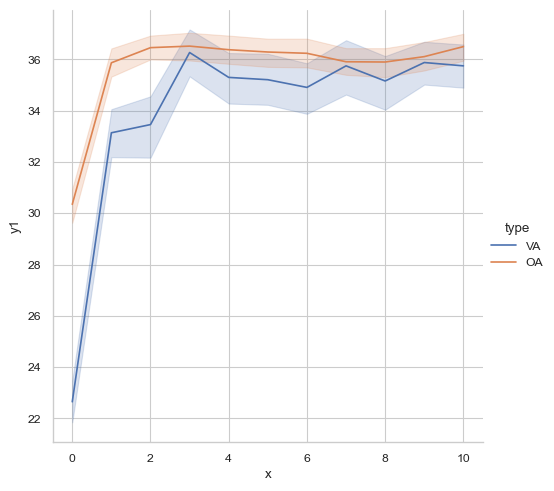

In [33]:
rs_VA = np.load('results/dqn_real_DoD100_Q100_rs_VA_test.npy')
x = np.array([len(rs_VA[i])*[i] for i in range(len(rs_VA))]).flatten()
df1 = pd.DataFrame({'x': x, 'y1': rs_VA.flatten(), 'type': 'VA'})

rs_OA = np.load('results/dqn_real_DoD100_Q100_rs_OA_test.npy')
# x_test = np.array([len(rs_test[i])*[i] for i in range(len(rs_test))]).flatten()
df2 = pd.DataFrame({'x': x, 'y2': rs_OA.flatten(), 'type': 'OA'}).rename(columns={'y2': 'y1'})

df = pd.concat([df1, df2], ignore_index=True)

# plot df
g = sns.relplot(data=df, x='x', y='y1', kind='line', hue='type')#, palette=['orange', 'blue'])

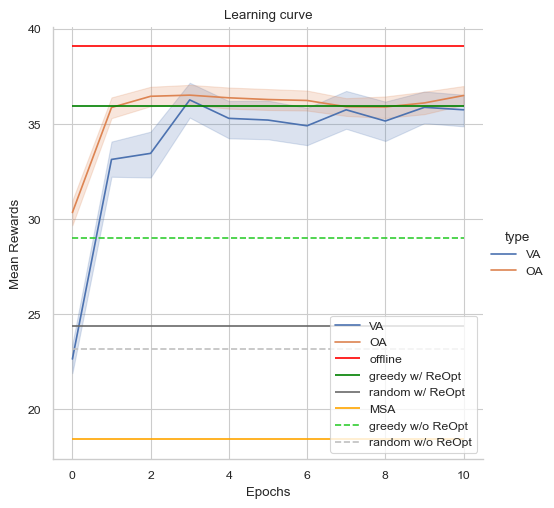

In [34]:
# episode_durations = np.load('results/dqn_rs_VA.npy')
# plt.plot(y, label="RL (DQN)")
# plt.hlines(res_SL["rs"].mean(), 0, 5, 'black', label="SL", linestyles='--')
# sns.relplot(
#     data=df, kind="line",
#     x="epoch", y="rs",
#     errorbar=("ci", 95),
    
#     # markers=True, dashes=False
# )

sns.relplot(
    data=df, kind="line",
    x="x", y="y1",
    hue='type',# palette=['orange', 'blue'],
    errorbar=("ci", 95),
    # markers=True, dashes=False
)

# sns.relplot(
#     data=df_test, kind="line",
#     x="epoch", y="rs",
#     errorbar=("ci", 95),
#     # markers=True, dashes=False
# )

plt.hlines(res_offline["rs"].mean(), 0, len(rs), 'red', label="offline", linestyles='solid')
plt.hlines(res_greedy["rs"].mean(), 0, len(rs), 'green', label="greedy w/ ReOpt", linestyles='solid')
plt.hlines(res_random["rs"].mean(), 0, len(rs), 'dimgray', label="random w/ ReOpt", linestyles='solid')
plt.hlines(res_MSA["rs"].mean(), 0, len(rs), 'orange', label="MSA", linestyles='solid')
plt.hlines(res_greedy_wo["rs"].mean(), 0, len(rs), 'limegreen', label="greedy w/o ReOpt", linestyles='--')
plt.hlines(res_random_wo["rs"].mean(), 0, len(rs), 'silver', label="random w/o ReOpt", linestyles='--')
# plt.hlines(res_MSA_wo["rs"].mean(), 0, len(rs), 'orange', label="MSA w/o ReOpt", linestyles='--')

plt.xlabel('Epochs')
plt.ylabel('Mean Rewards')
plt.title('Learning curve')
plt.legend()
plt.show()

In [8]:
res_greedy['rs']

array([32., 40., 31., 35., 36., 40., 39., 35., 38., 40., 37., 35., 35.,
       36., 33., 37., 33., 33., 34., 34., 39., 40., 38., 37., 35., 40.,
       36., 39., 36., 40., 40., 31., 40., 37., 40., 33., 37., 33., 34.,
       32., 32., 36., 34., 39., 40., 40., 39., 35., 35., 28., 35., 39.,
       33., 39., 36., 40., 31., 35., 35., 34., 35., 39., 36., 36., 33.,
       34., 34., 38., 39., 37., 39., 32., 40., 31., 34., 35., 37., 39.,
       40., 26., 33., 39., 33., 40., 36., 30., 35., 34., 35., 36., 36.,
       39., 36., 32., 38., 38., 40., 34., 37., 36.])

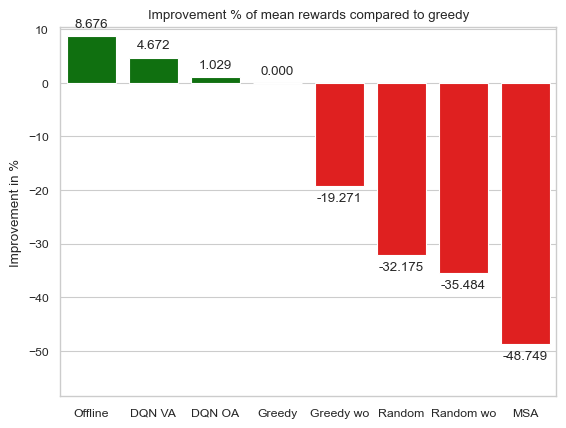

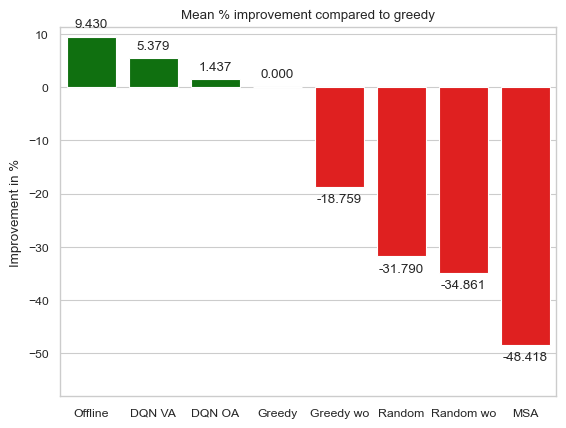

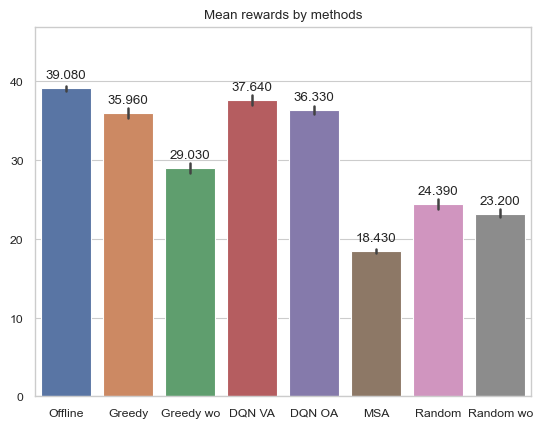

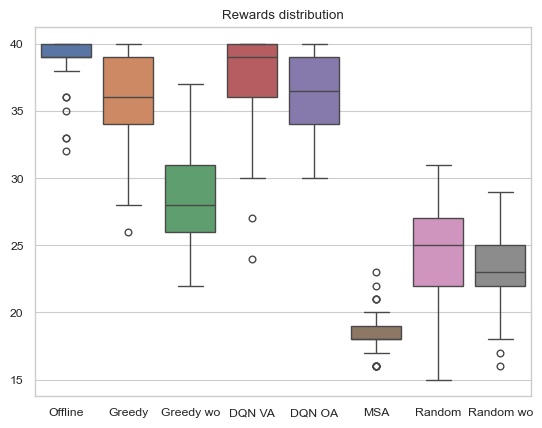

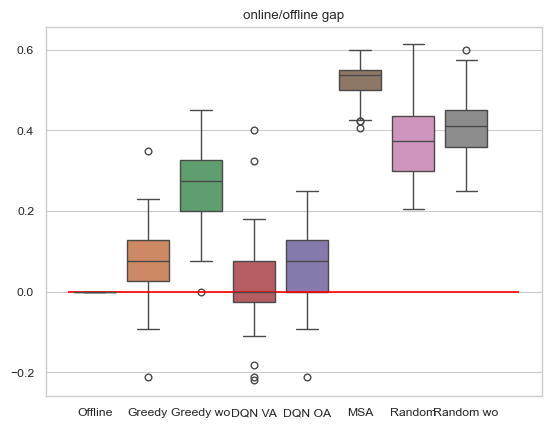

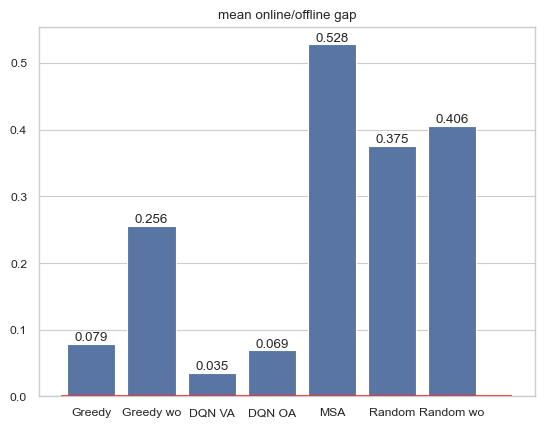

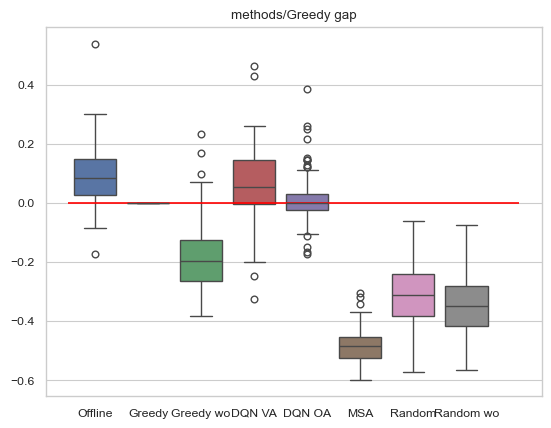

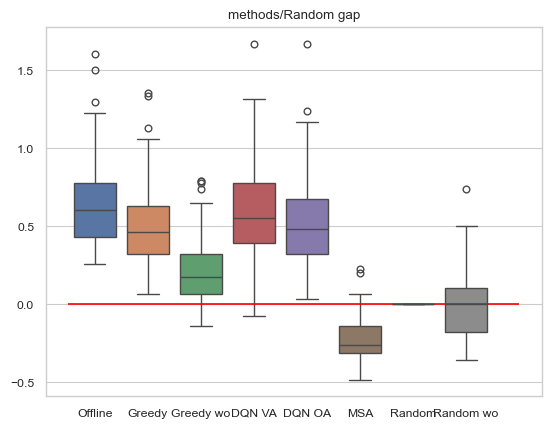

In [35]:
data = {
    "Offline" : res_offline['rs'],
    "Greedy" : res_greedy['rs'],
    "Greedy wo" : res_greedy_wo['rs'],
    # "SL" : res_SL['rs'],
    "DQN VA" : res_RL_wo['rs'],
    "DQN OA" : res_RL['rs'],
    # "MSA" : res_MSA['rs'],
    "MSA" : res_MSA['rs'],
    # "MSA wo" : res_MSA_wo['rs'], # w/o ReOpt
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
    "Random wo" : res_random_wo['rs'],
}

sns.color_palette("deep")
plot(data)

### RL vs Greedy

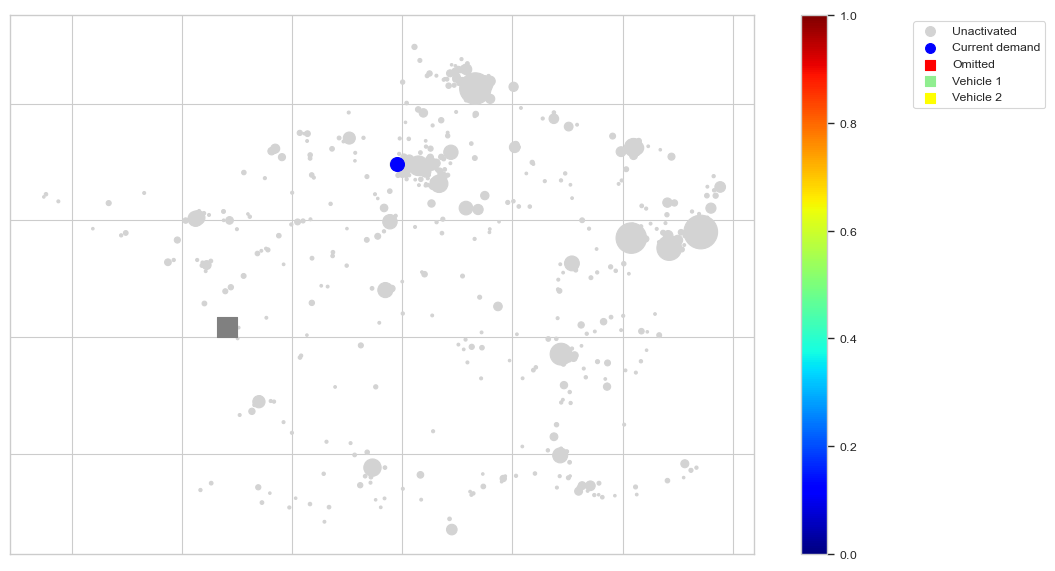

'\\documentclass{report}\n\\usepackage{tikz}\n\\usepackage{subcaption}\n\n\\begin{document}\n\\begin{figure}\n  \\begin{tikzpicture}\n      \\draw\n        (-1.173, 46.162) node[gray] (0){0};\n      \\begin{scope}[->]\n      \\end{scope}\n    \\end{tikzpicture}\n\\end{figure}\n\\end{document}'

In [ ]:
from envs import DynamicQVRPEnv
scenario = 2

env = DynamicQVRPEnv(**env_configs)
env.reset(scenario)
env.render()

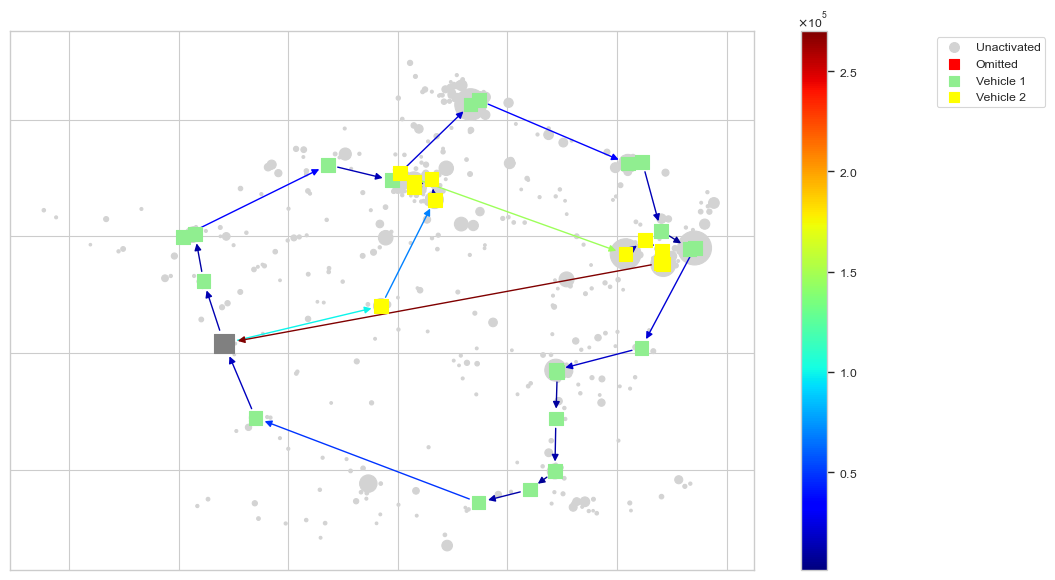

{'assignment': array([1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2,
        2, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 'routes': array([[ 0, 25,  7, 26,  9,  1,  4, 18, 11, 20, 13, 16,  8, 12,  3, 30,
         10, 24, 29, 31, 15,  0],
        [ 0, 27,  2, 22, 21, 28,  5, 17, 23,  6, 14, 19,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'costs per vehicle': array([300., 223.]),
 'omitted': array([], dtype=int64),
 'remained_quota': np.float64(3.0999999999999943),
 'episode rewards': np.float64(31.0),
 'quantity accepted': np.float64(31.0),
 'remained capacity': np.float64(9.0),
 'h': 31,
 'j': 31,
 'quantity demanded': np.float64(1.0),
 'dest': np.int64(472)}

In [11]:
env.reset(scenario)
i = 0
for i in range(len(res_greedy['actions'][scenario])):
    o, _, d, trun, info = env.step(res_greedy['actions'][scenario][i])
    i+=1
    if d or trun:
        break

env.render(display_current_node=False)
info

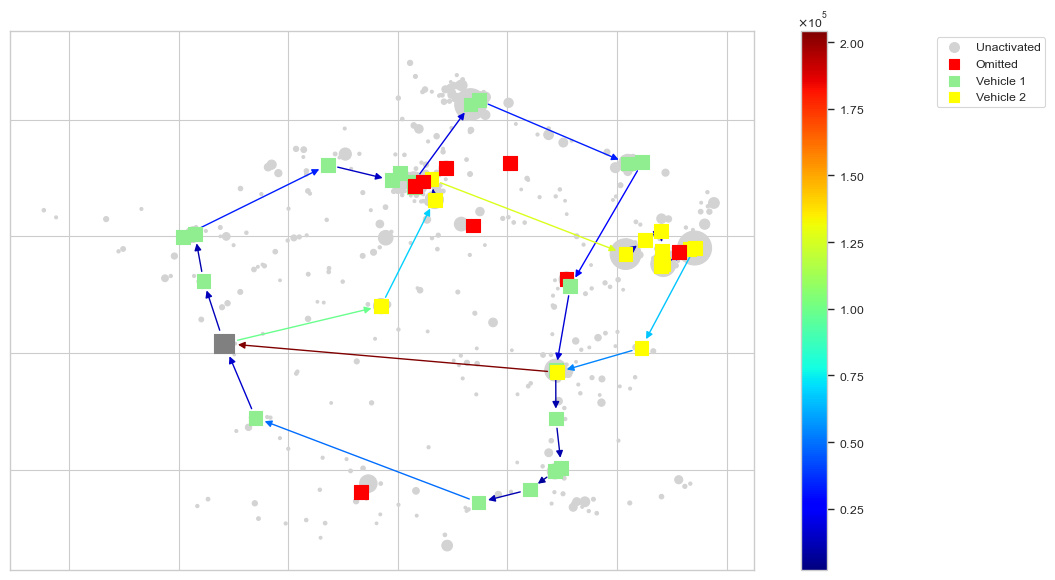

{'assignment': array([1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2,
        2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0]),
 'routes': array([[ 0, 25,  7, 26,  9,  1,  5, 21, 28,  4, 18, 11, 20, 42,  3, 10,
         34, 24, 29, 31, 15,  0],
        [ 0, 27,  2, 22, 17, 23, 13,  6, 14, 19, 32, 16,  8, 12, 30,  0,
          0,  0,  0,  0,  0,  0]]),
 'costs per vehicle': array([289., 237.]),
 'omitted': array([464, 287, 247, 485, 392, 483, 466, 473]),
 'remained_quota': np.float64(0.0),
 'episode rewards': np.float64(34.0),
 'quantity accepted': np.float64(34.0),
 'remained capacity': np.float64(6.0),
 'h': 42,
 'j': 42,
 'quantity demanded': np.float64(1.0),
 'dest': np.int64(124)}

In [51]:
env.reset(scenario)
i = 0
for i in range(len(res_RL['actions'][scenario])):
    o, _, d, trun, info = env.step(res_RL['actions'][scenario][i])
    i+=1
    if d or trun:
        break

env.render(display_current_node=False)
info

## VRP 4 vehicles Full Dynamic Q = 50

### Plots

{'horizon': 100, 'Q': 50, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'emissions_KM': [0.1, 0.1, 0.3, 0.3], 'test': True, 'vehicle_assignment': True}


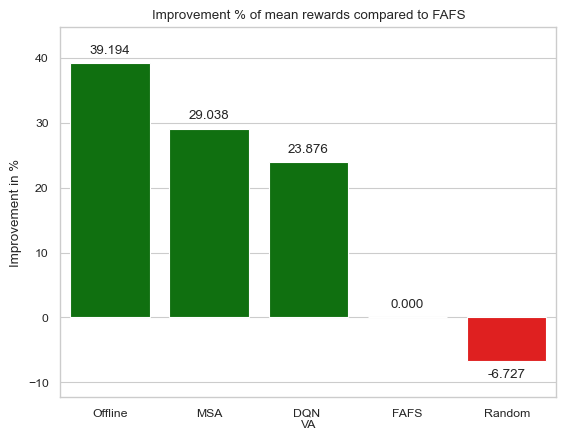

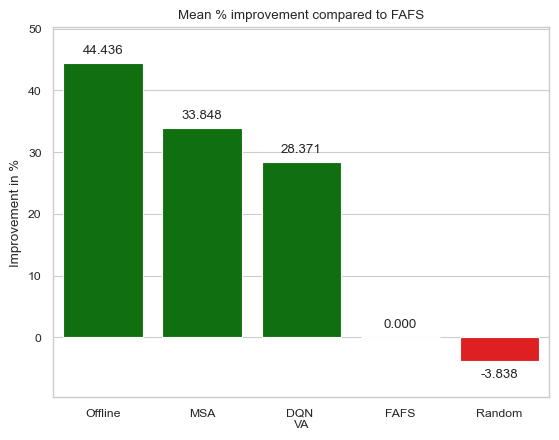

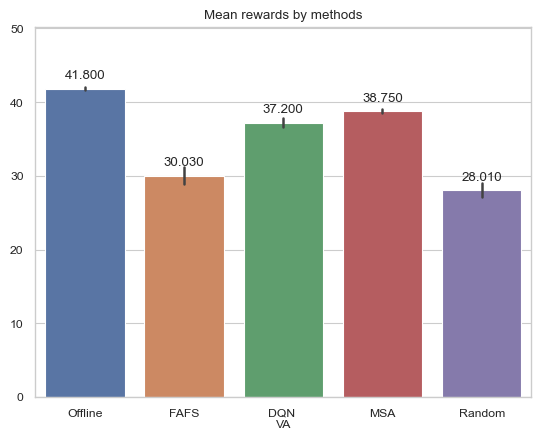

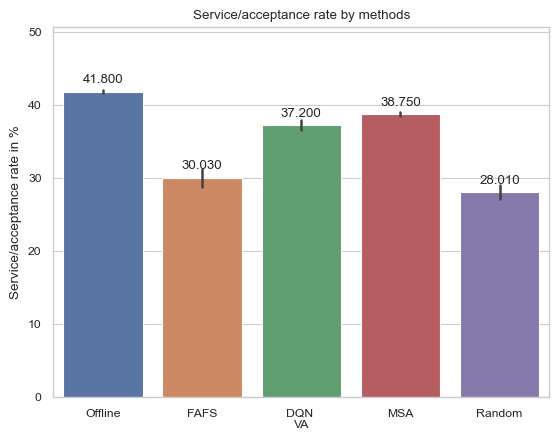

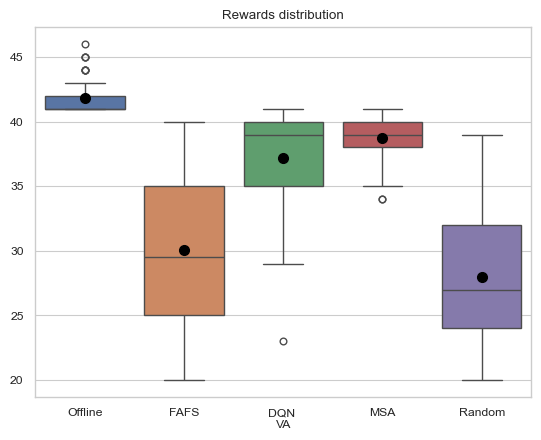

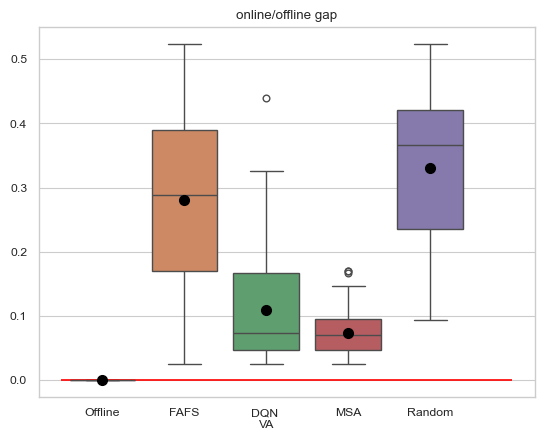

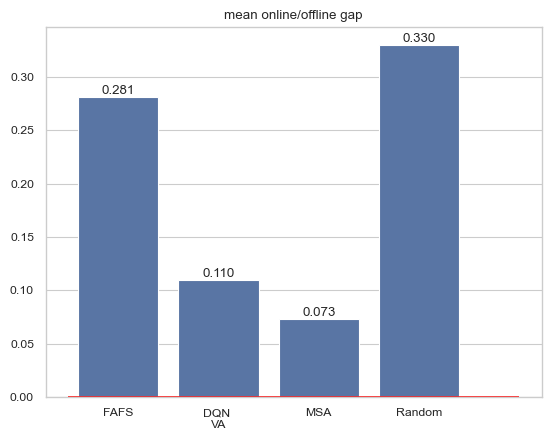

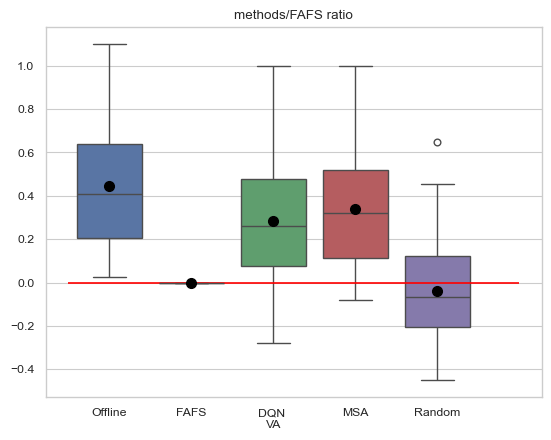

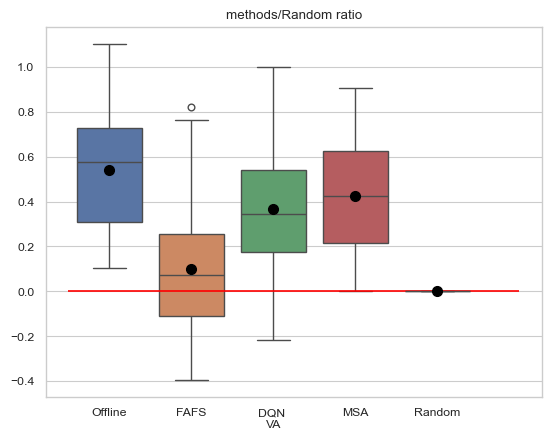

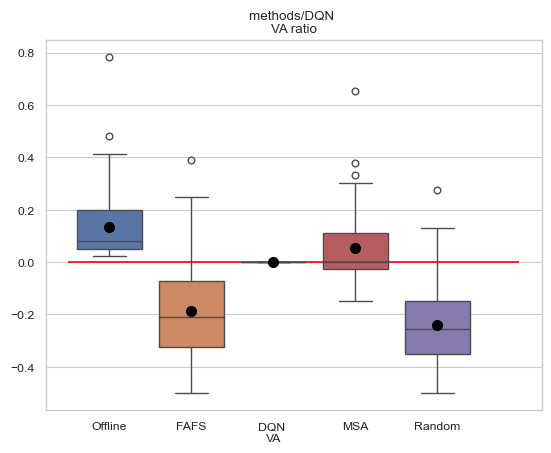

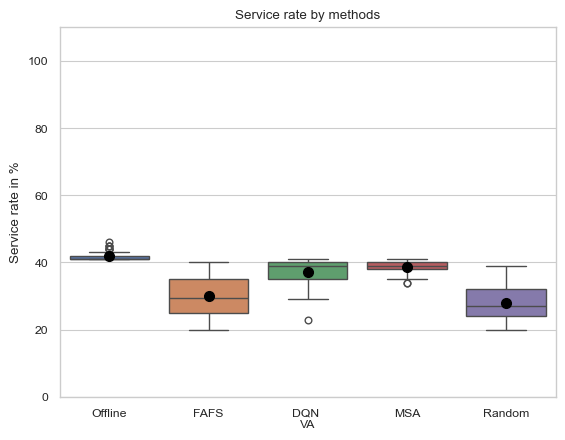

In [2]:
import pickle

wo = 'woReOpt'
w = 'wReOpt'
file = "res_VRP4_DoD100_Q50"

with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)

with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)
    

with open(f'results/{file}/{w}/res_RL_DQN_OA.pkl', "rb") as f:
    res_RL = pickle.load(f)
    

with open(f'results/{file}/{w}/res_fafs.pkl', "rb") as f:
    res_greedy = pickle.load(f)
    
with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)

    
with open(f'results/{file}/{w}/res_RL_DQN_VA_as_OA.pkl', "rb") as f:
    res_RL_VAasOA = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_RL_DQN_VA.pkl', "rb") as f:
    res_RL_VA = pickle.load(f)
    
with open(f'results/{file}/{w}/res_RL_DQN_VA_as_OA2.pkl', "rb") as f:
    res_RL_VAasOA2 = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_RL_DQN_VA2.pkl', "rb") as f:
    res_RL_VA2 = pickle.load(f)


with open(f'results/{file}/{w}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)
with open(f'results/{file}/{w}/res_MSA_softmax.pkl', "rb") as f:
    res_MSA_soft = pickle.load(f)
    
data = {
    "Offline" : res_offline['rs'],
    "FAFS" : res_greedy['rs'],
    # "Greedy \nw/o ReOpt" : res_greedy_wo['rs'],
    # "SL" : res_SL['rs'],
    # "DQN \nVA" : res_RL_VA['rs'],
    "DQN \nVA" : res_RL_VA2['rs'],
    # "DQN \nVA as OA" : res_RL_VAasOA['rs'],
    # "DQN \nVA as OA" : res_RL_VAasOA2['rs'],
    # "DQN VA uni" : res_RL_wo_uni['rs'],
    # "DQN VA uni2" : res_RL_wo_uniuni['rs'],
    # "DQN \nOA" : res_RL['rs'],
    # "DQN OA uni" : res_RL_uni['rs'],
    "MSA" : res_MSA['rs'],
    # "MSA Softmax" : res_MSA_soft['rs'],
    # "MSA wo" : res_MSA_wo['rs'], # w/o ReOpt
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
    # "Random \nw/o ReOpt" : res_random_wo['rs'],
}

sns.color_palette("deep")
plot(data, 
    total_cap=env_configs["vehicle_capacity"]*4,
     H=env_configs["horizon"]
)

### Routes

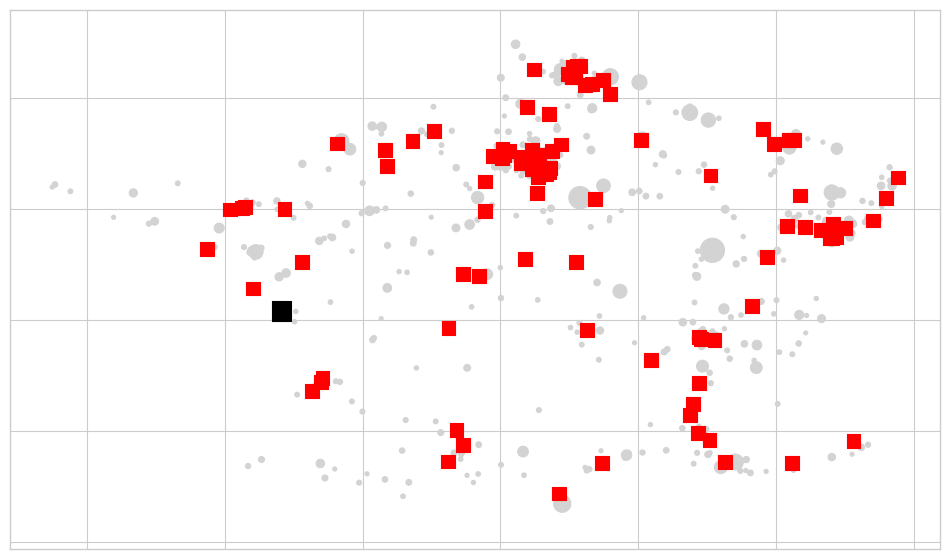

'\\documentclass{report}\n\\usepackage{tikz}\n\\usepackage{subcaption}\n\n\\begin{document}\n\\begin{figure}\n  \\begin{tikzpicture}\n      \\draw\n        (-1.173, 46.162) node[black] (0){0}\n        (1.777, 47.975) node[red] (1){1}\n        (2.986, 50.439) node[red] (2){2}\n        (3.326, 50.26) node[red] (3){3}\n        (5.653, 46.261) node[red] (4){4}\n        (6.844, 47.523) node[red] (5){5}\n        (2.294, 48.935) node[red] (6){6}\n        (2.027, 48.923) node[red] (7){7}\n        (3.06, 50.571) node[red] (8){8}\n        (2.463, 48.72) node[red] (9){9}\n        (3.486, 50.331) node[red] (10){10}\n        (2.05, 48.982) node[red] (11){11}\n        (1.46, 43.759) node[red] (12){12}\n        (6.8, 47.541) node[red] (13){13}\n        (3.034, 50.374) node[red] (14){14}\n        (2.032, 49.083) node[red] (15){15}\n        (2.313, 48.873) node[red] (16){16}\n        (1.04, 49.41) node[red] (17){17}\n        (3.376, 48.185) node[red] (18){18}\n        (0.357, 48.777) node[red] (19){19}

In [4]:
from envs import DynamicQVRPEnv
scenario = 2

env = DynamicQVRPEnv(**env_configs)
env.reset(scenario)
while True:
    o, r, d, trun, info = env.step(0)
    if d or trun:
        break
env.render(display_current_node=False, show_legend=False)

reward :  80


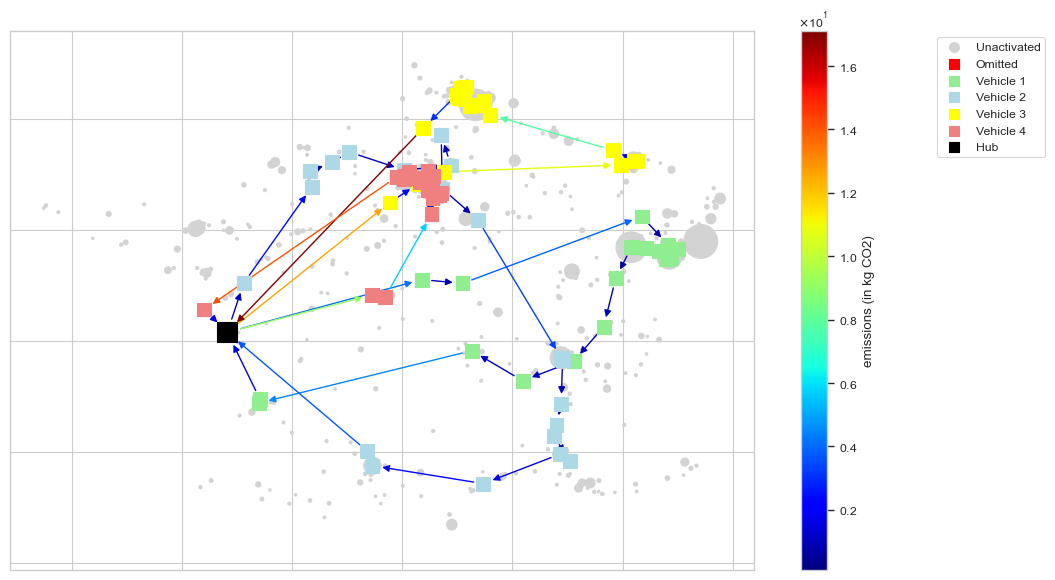

{'assignment': array([0, 3, 3, 1, 1, 4, 4, 3, 4, 3, 4, 2, 1, 3, 2, 4, 2, 2, 2, 4, 3, 3,
        2, 0, 2, 3, 2, 1, 2, 4, 1, 0, 1, 0, 0, 4, 4, 4, 0, 0, 0, 1, 3, 4,
        2, 4, 2, 1, 0, 0, 0, 0, 3, 4, 2, 2, 0, 3, 1, 0, 1, 0, 1, 3, 3, 3,
        4, 4, 0, 2, 3, 1, 2, 0, 4, 0, 2, 3, 2, 2, 1, 3, 1, 0, 3, 1, 4, 1,
        1, 1, 4, 0, 4, 3, 2, 1, 2, 1, 4, 3]),
 'routes': array([[  0,  48,  88,  90,  72,  81,   5,  63,  33,  86,  13,  83,  42,
          31,  98,   4,  59,  61,  96,  89,  28,   0],
        [  0,  25,  19,  77,  45,  17,  15,  47,  95,  56,  18,  70,  80,
          29,  97,  55,  79,  23,  27,  12,  73,   0],
        [  0,  94,  26,  64,  82,  53,  71,  22,  85,  66,  10,   3,  43,
         100,  14,  78,  21,  65,   8,   2,  58,   0],
        [  0,  46,  20,  44,   9,  87,  93,  75,  54,  37,  38,  67,  91,
          68,  16,   6,  30,   7,  11,  36,  99,   0]]),
 'distance per vehicle': array([228., 240., 214., 146.]),
 'emissions per vehicle': array([22.8, 24. , 64.2, 43.8]),

In [14]:
# Offline wo Q
env.Q = 1e19
env.reset(scenario)

env.assignment, env.routes, env.info = env.offline_solution()
# for i in range(len(res_offline['actions'][scenario])):
#     o, _, d, trun, info = env.step(res_offline['actions'][scenario][i])
#     i+=1
#     if d or trun:
#         break

print("reward : ", np.sum(env.assignment.astype(bool)))
# env.render(display_current_node=False, display_unactivated=False)
env.render(display_current_node=False)
env.info

reward :  42


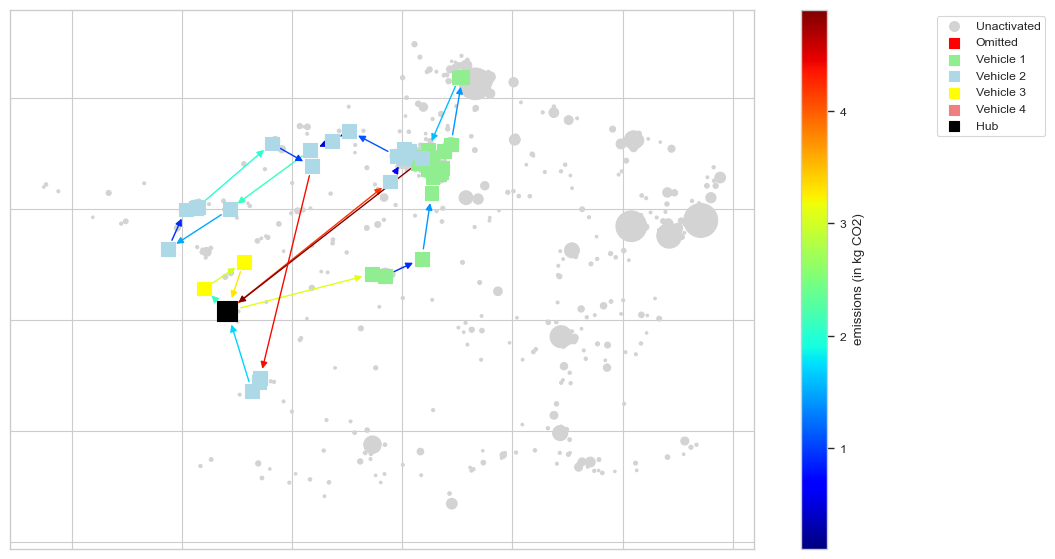

{'assignment': array([0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0,
        0, 0, 3, 1, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1,
        2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 3, 0]),
 'routes': array([[ 0, 46, 20, 48, 44, 75, 93, 54, 37, 56, 38, 82, 47, 78, 14, 91,
         16,  6, 87,  9, 26,  0],
        [ 0, 94,  7, 11, 64, 30, 15, 36, 17, 45, 77, 41, 74, 57, 35, 34,
         92, 19, 28, 89, 39,  0],
        [ 0, 99, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'distance per vehicle': array([165., 226.,  28.,   0.]),
 'emissions per vehicle': array([16.5, 22.6,  8.4,  0. ]),
 'omitted': array([ 0,  1,  2,  3,  4,  7,  9, 11, 12, 17, 20, 21, 22, 23, 26, 28, 30,


In [5]:
env.reset(scenario)
# i = 0

env.assignment, env.routes, env.info = env.offline_solution()
# for i in range(len(res_offline['actions'][scenario])):
#     o, _, d, trun, info = env.step(res_offline['actions'][scenario][i])
#     i+=1
#     if d or trun:
#         break

print("reward : ", np.sum(env.assignment.astype(bool)))
# env.render(display_current_node=False, display_unactivated=False)
env.render(display_current_node=False)
env.info

reward :  31.0


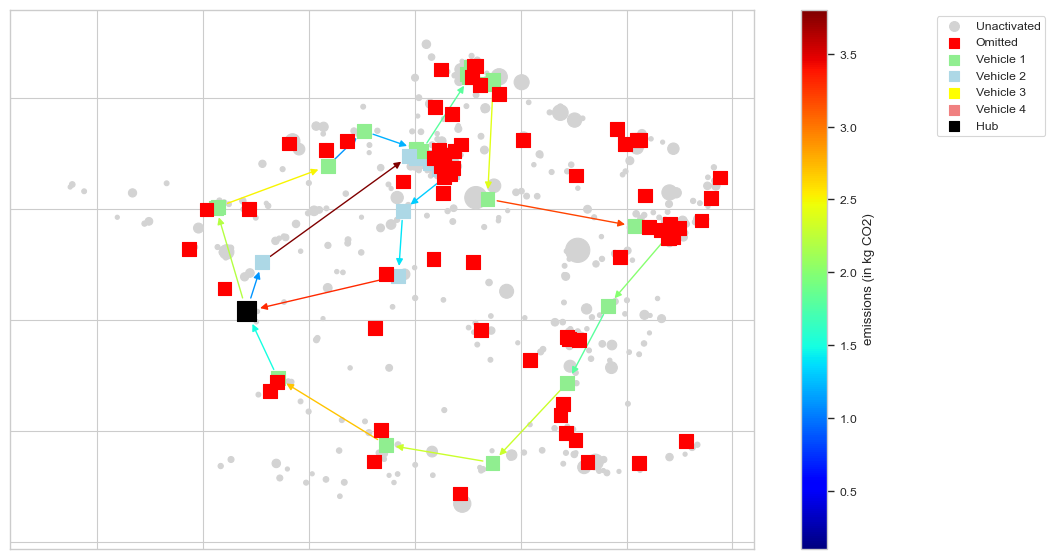

{'assignment': array([2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0,
        0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'routes': array([[ 0, 35, 34, 19, 17, 15, 30, 14,  2,  8,  3, 10, 18, 31,  5, 13,
          4, 29, 27, 12, 28,  0],
        [ 0, 25, 36,  7, 11,  6, 16, 26,  9, 37,  1, 20,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'distance per vehicle': array([292., 123.,   0.,   0.]),
 'emissions per vehicle': array([29.2, 12.3,  0. ,  0. ]),
 'omitted': array([469, 476, 486, 499, 466, 481, 393, 406, 467, 432, 403, 471, 427,
   

In [25]:
env.reset(scenario)
episode_r = 0
while True:
    o, r, d, trun, info = env.step(1)
    episode_r+=r
    if d or trun:
        break
print("reward : ", episode_r)
env.render(display_current_node=False)
info

reward :  39.0


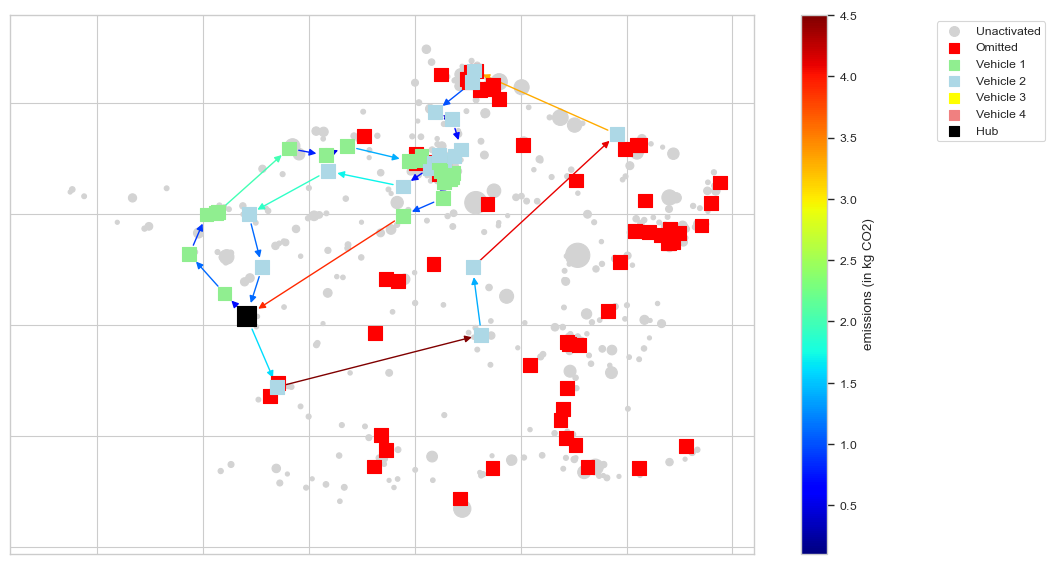

{'assignment': array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
        0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 1,
        1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0,
        2, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2,
        2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 1, 0]),
 'routes': array([[ 0, 99, 74, 57, 35, 34, 92, 77, 45, 36, 11, 30, 68, 87, 93, 56,
         37, 54, 75, 44,  1,  0],
        [ 0, 89, 96, 88, 85, 65, 78, 58, 95, 47, 82, 67, 91, 64, 16, 26,
         94, 19, 41, 25,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'distance per vehicle': array([149., 249.,   0.,   0.]),
 'emissions per vehicle': array([14.9, 24.9,  0. ,  0. ]),
 'omitted': array([441, 498, 410, 496, 494, 489, 351, 157, 491, 490, 454, 373, 408,
   

In [26]:
# rewards_VA = np.zeros(100)
episode_r = 0

# for scenario in range(100):
env.reset(scenario)
for i in range(len(res_MSA['actions'][scenario])):
    o, r, d, trun, info = env.step(res_MSA['actions'][scenario][i])
    episode_r+=r
    # rewards_VA[scenario] += r
    if d or trun:
        break
    
print("reward : ", episode_r)
env.render(display_current_node=False)
info

reward :  32.0
reward in tests :  32.0


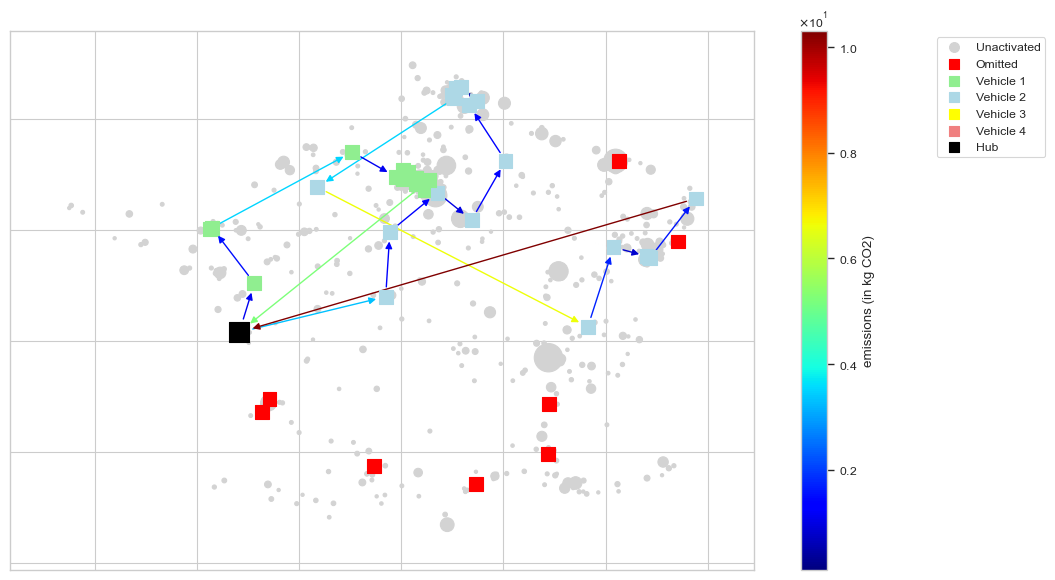

{'omitted': array([490, 476, 486, 499, 343, 309, 179, 406]),
 'remained_quota': np.float64(0.0),
 'episode rewards': np.float64(32.0),
 'quantity accepted': np.float64(32.0),
 'remained capacity': np.float64(48.0),
 'h': 40,
 't': 40,
 'dest': np.int64(467),
 'assignment': array([2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0,
        0, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'j': 0,
 'quantity demanded': np.float64(1.0),
 'distance per vehicle': array([143., 357.,   0.,   0.]),
 'emissions per vehicle': array([14.3, 35.7,  0. ,  0. ]),
 'routes': array([[ 0, 25, 34, 35, 17, 36,  7, 11, 15, 30,  6, 16, 26,  9, 38,  0,
          0,  0,  0,  0,  0,  0],
        [ 0, 20,  1, 37, 18, 32,  3, 10, 21,  8,  2, 14, 19,  4, 31,  5,
         13, 33, 40,  0,  0,  

In [27]:
env_configs_VA = deepcopy(env_configs)
env_configs_VA['vehicle_assignment'] = True
env_configs_VA['re_optimization'] = False
env = DynamicQVRPEnv(**env_configs_VA)
# rewards_VA = np.zeros(100)
episode_r = 0

# for scenario in range(100):
env.reset(scenario)
for i in range(len(res_RL_VA2['actions'][scenario])):
    o, r, d, trun, info = env.step(res_RL_VA2['actions'][scenario][i])
    episode_r+=r
    # rewards_VA[scenario] += r
    if d or trun:
        break
    
print("reward : ", episode_r)
print("reward in tests : ", res_RL_VA2['rs'][scenario])
env.render(display_current_node=False)
info

In [29]:
idx = np.argmax(res_RL_VA2['rs'])
print(idx, res_RL_VA2['rs'][idx])

2 40.0


## Uniform

### Plots

{'horizon': 100, 'Q': 50, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'emissions_KM': [0.1, 0.1, 0.3, 0.3], 'uniform_scenario': True, 'test': True}


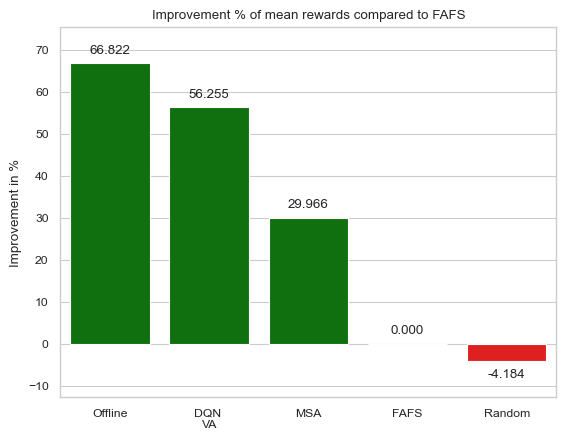

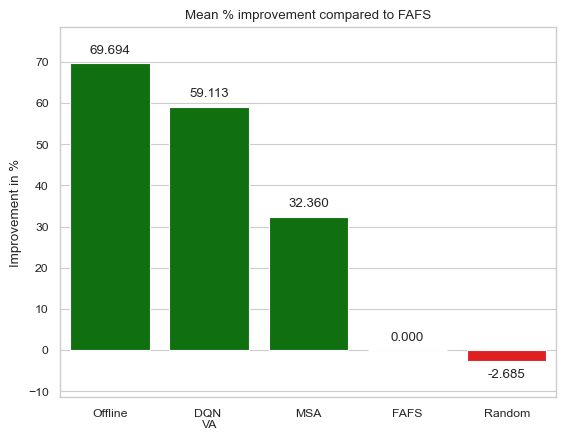

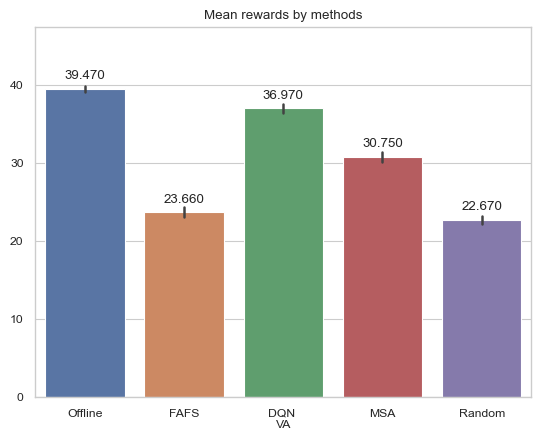

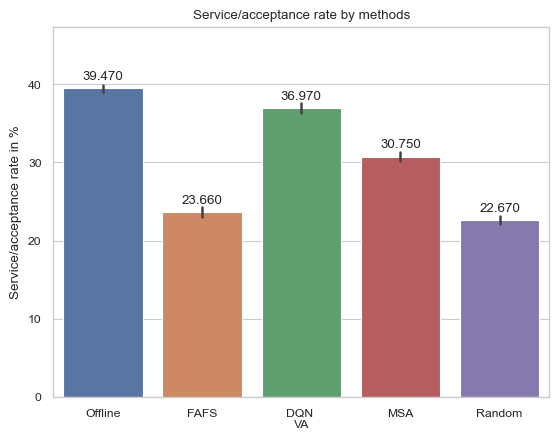

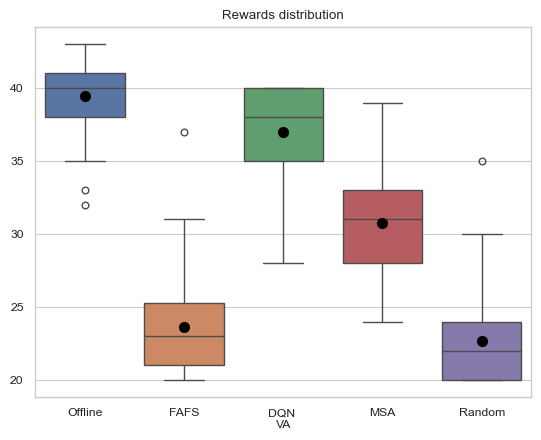

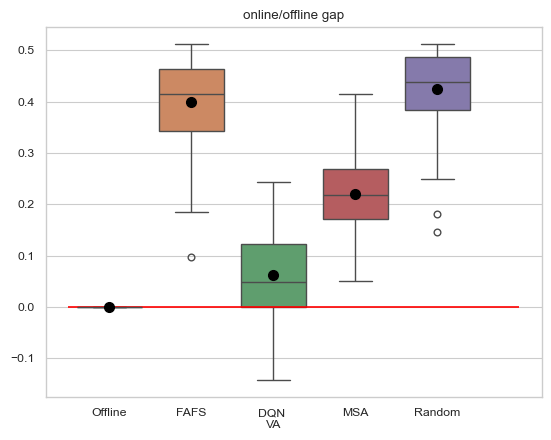

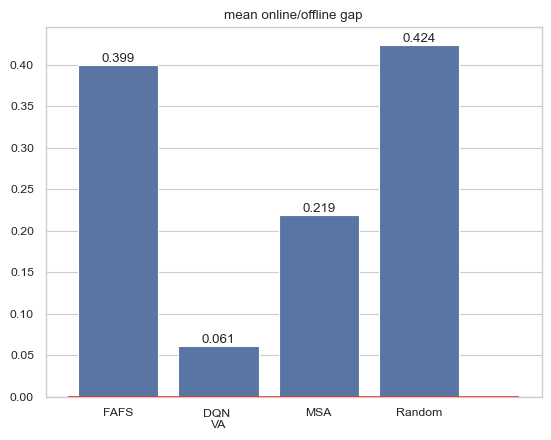

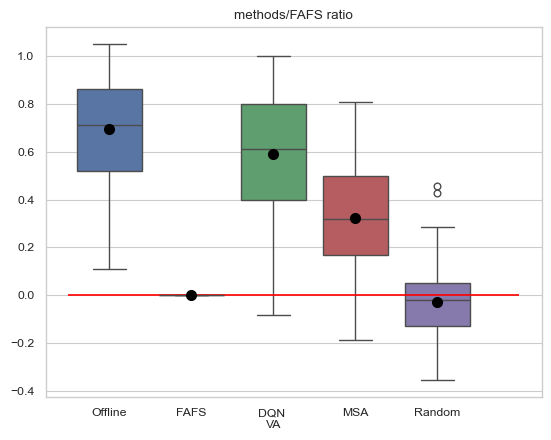

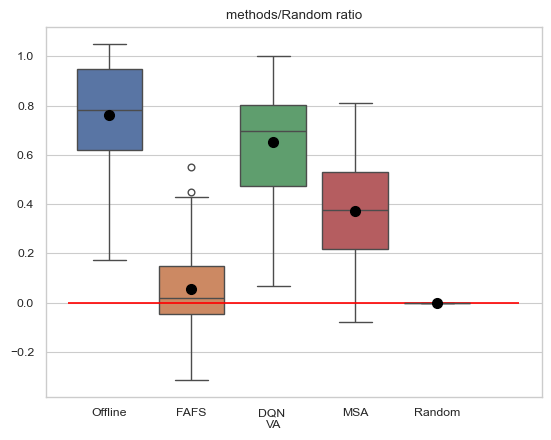

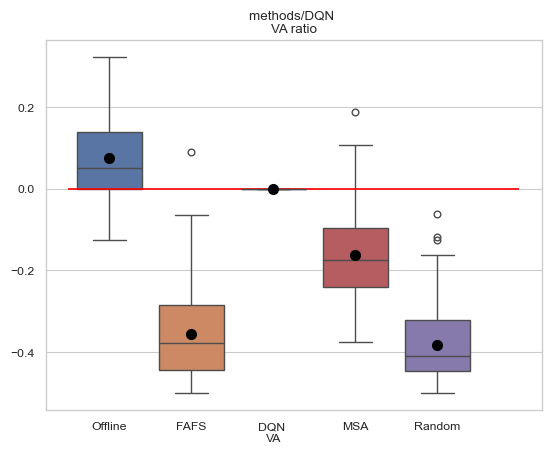

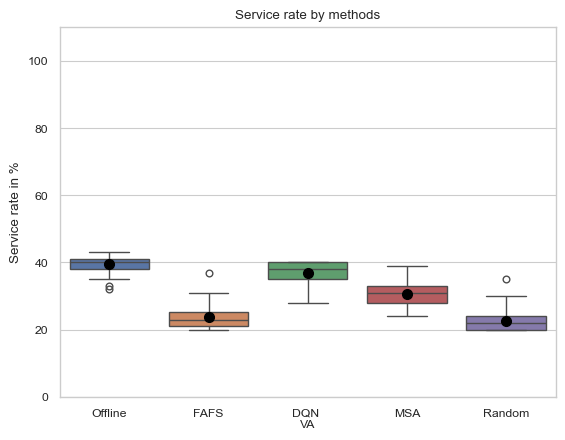

In [2]:
import pickle

wo = 'woReOpt'
w = 'wReOpt'
file = "res_VRP4_DoD100_Q50_uniform"

with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)

with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)
    

# with open(f'results/{file}/{w}/res_RL_DQN_OA.pkl', "rb") as f:
#     res_RL = pickle.load(f)
    

with open(f'results/{file}/{w}/res_fafs.pkl', "rb") as f:
    res_greedy = pickle.load(f)
    
with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)

    
# with open(f'results/{file}/{w}/res_RL_DQN_VA_as_OA.pkl', "rb") as f:
#     res_RL_VAasOA = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_RL_DQN_VA.pkl', "rb") as f:
    res_RL_VA = pickle.load(f)
    
# with open(f'results/{file}/{w}/res_RL_DQN_VA_as_OA2.pkl', "rb") as f:
#     res_RL_VAasOA2 = pickle.load(f)
    
# with open(f'results/{file}/{wo}/res_RL_DQN_VA2.pkl', "rb") as f:
#     res_RL_VA2 = pickle.load(f)


with open(f'results/{file}/{w}/res_MSA.pkl', "rb") as f:
    res_MSA = pickle.load(f)
    
data = {
    "Offline" : res_offline['rs'],
    "FAFS" : res_greedy['rs'],
    # "Greedy \nw/o ReOpt" : res_greedy_wo['rs'],
    # "SL" : res_SL['rs'],
    "DQN \nVA" : res_RL_VA['rs'],
    # "DQN \nVA" : res_RL_VA2['rs'],
    # "DQN \nVA as OA" : res_RL_VAasOA['rs'],
    # "DQN \nVA as OA" : res_RL_VAasOA['rs'],
    # "DQN \nVA as OA" : res_RL_VAasOA2['rs'],
    # "DQN VA uni" : res_RL_wo_uni['rs'],
    # "DQN VA uni2" : res_RL_wo_uniuni['rs'],
    # "DQN \nOA" : res_RL['rs'],
    # "DQN OA uni" : res_RL_uni['rs'],
    "MSA" : res_MSA['rs'],
    # "MSA wo" : res_MSA_wo['rs'], # w/o ReOpt
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
    # "Random \nw/o ReOpt" : res_random_wo['rs'],
}

sns.color_palette("deep")
plot(data, 
    total_cap=env_configs["vehicle_capacity"]*4,
     H=env_configs["horizon"]
)

### Routes

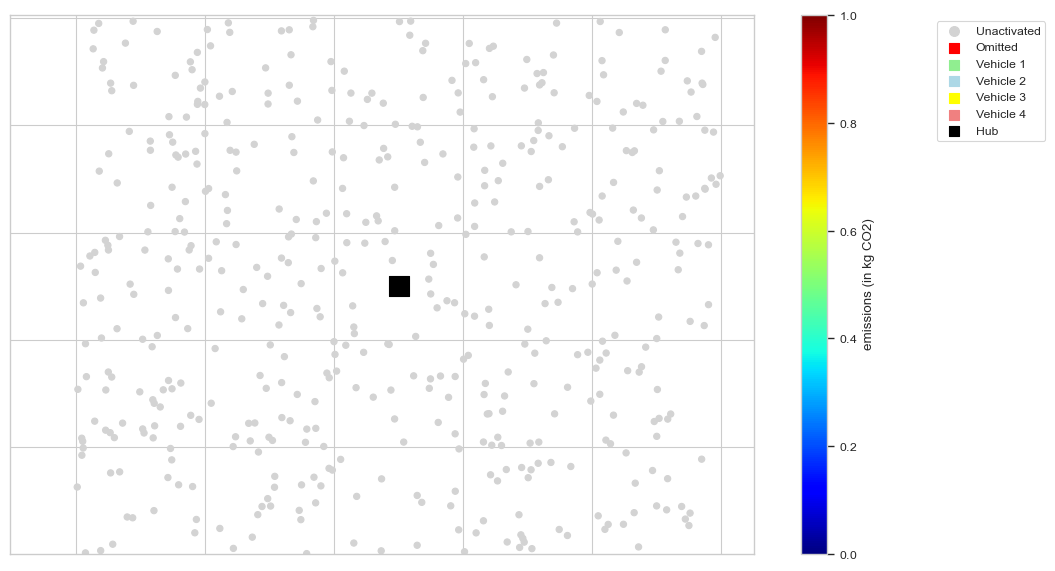

'\\documentclass{report}\n\\usepackage{tikz}\n\\usepackage{subcaption}\n\n\\begin{document}\n\\begin{figure}\n  \\begin{tikzpicture}\n      \\draw\n        (50.0, 50.0) node[black] (0){0};\n      \\begin{scope}[->]\n      \\end{scope}\n    \\end{tikzpicture}\n\\end{figure}\n\\end{document}'

In [3]:
from envs import DynamicQVRPEnv
scenario = 0

env = DynamicQVRPEnv(**env_configs)
env.reset(scenario)
env.render(display_current_node=False)

reward :  80


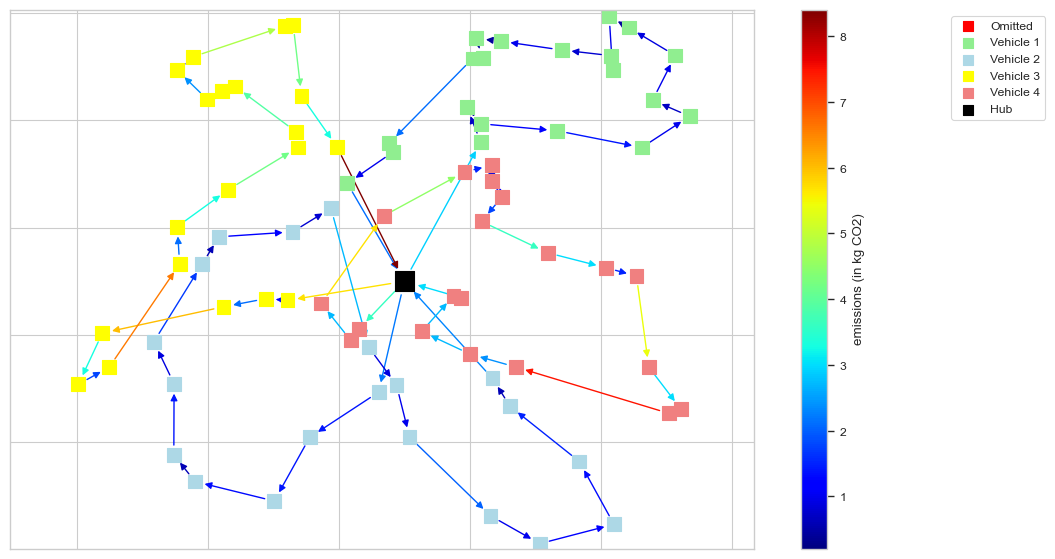

{'assignment': array([0, 1, 4, 3, 4, 1, 2, 1, 3, 3, 1, 3, 4, 2, 1, 2, 0, 2, 3, 1, 3, 0,
        3, 0, 4, 2, 4, 3, 2, 3, 0, 4, 1, 0, 2, 0, 0, 2, 2, 4, 3, 0, 4, 4,
        2, 4, 4, 2, 4, 1, 1, 2, 4, 4, 0, 3, 3, 1, 1, 0, 0, 4, 3, 0, 4, 0,
        0, 3, 0, 2, 1, 1, 3, 0, 1, 2, 3, 3, 1, 3, 4, 1, 2, 0, 2, 3, 4, 2,
        1, 4, 3, 1, 0, 1, 4, 2, 2, 2, 1, 0]),
 'routes': array([[ 0, 89,  2, 20, 59, 50, 75, 11, 82, 94, 72, 58, 71, 33, 79,  6,
         92, 15, 51,  8, 99,  0],
        [ 0, 52, 83, 48,  7, 96, 39, 38, 35, 45, 88, 14, 70, 18, 76, 85,
         97, 16, 98, 29, 26,  0],
        [ 0, 19, 30, 80, 86, 78,  9, 73, 63, 28, 57, 10, 56,  4, 91, 41,
         68, 77, 12, 23, 21,  0],
        [ 0, 40, 25, 49, 53, 46,  3, 62, 65, 43, 95, 90, 87, 44, 47, 81,
         32, 27, 54,  5, 13,  0]]),
 'distance per vehicle': array([201., 280., 226., 206.]),
 'emissions per vehicle': array([20.1, 28. , 67.8, 61.8]),
 'omitted': array([ 0, 16, 21, 23, 30, 33, 35, 36, 41, 54, 59, 60, 63, 65, 66, 68, 73,


In [10]:
# Offline wo Q
env.Q = 1e19
env.reset(scenario)

env.assignment, env.routes, env.info = env.offline_solution()
# for i in range(len(res_offline['actions'][scenario])):
#     o, _, d, trun, info = env.step(res_offline['actions'][scenario][i])
#     i+=1
#     if d or trun:
#         break

print("reward : ", np.sum(env.assignment.astype(bool)))
env.render(display_current_node=False, display_unactivated=False)
env.info

reward :  40


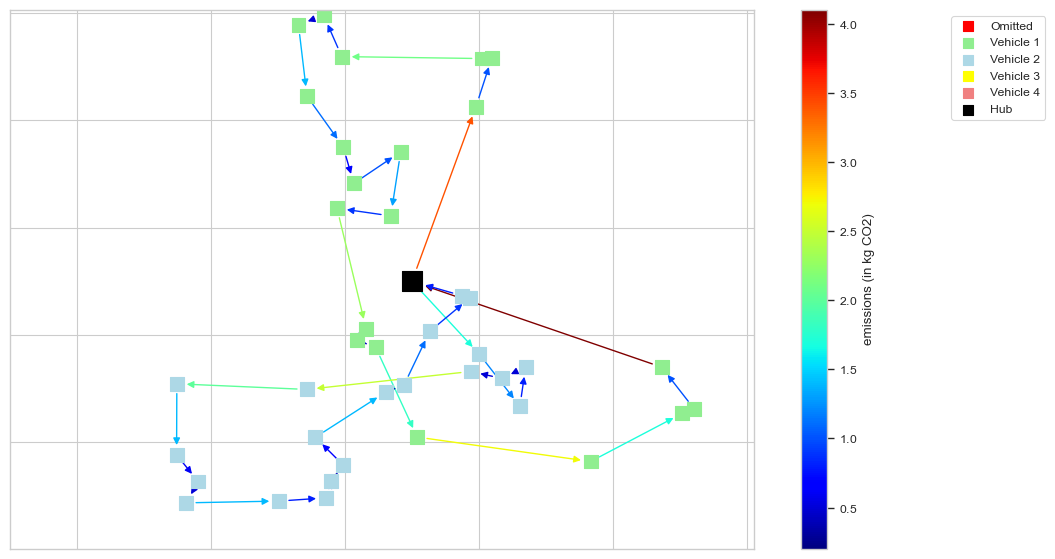

{'assignment': array([2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1, 1,
        1, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1,
        0, 0, 1, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2]),
 'routes': array([[  0,   2,  92,  15,  84,  22,  12,  23,  21,  99,   8,  53,  14,
          40,  25,  70,  76,  98,  81,  47,  44,   0],
        [  0,  27,  29,  32,  26,  17,  69,  39,  96,   7,   1,  48, 100,
          31,  42,  83,  52,  18,  54,  13,   5,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0]]),
 'distance per vehicle': array([290., 202.,   0.,   0.]),
 'emissions per vehicle': array([29. , 20.2,  0. ,  0. ]),

In [41]:
# Offline
env = DynamicQVRPEnv(**env_configs)
env.reset(scenario)

env.assignment, env.routes, env.info = env.offline_solution()
# for i in range(len(res_offline['actions'][scenario])):
#     o, _, d, trun, info = env.step(res_offline['actions'][scenario][i])
#     i+=1
#     if d or trun:
#         break

print("reward : ", np.sum(env.assignment.astype(bool)))
env.render(display_current_node=False, display_unactivated=False)
env.info

reward :  20.0


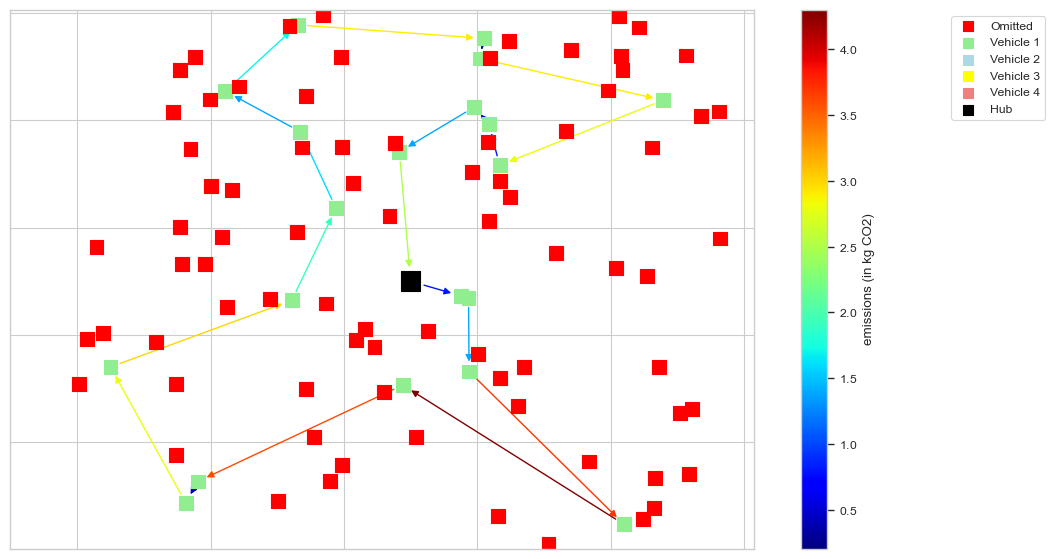

{'assignment': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'routes': array([[ 0,  5, 13, 17, 16, 18,  7,  1,  9, 19, 14, 10,  4, 12,  6, 15,
         11,  3, 20,  2,  8,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'distance per vehicle': array([410.,   0.,   0.,   0.]),
 'emissions per vehicle': array([41.,  0.,  0.,  0.]),
 'omitted': array([395, 440, 469,  15, 194, 252, 319, 314, 416, 280,  63,  75, 209,
       

In [42]:
# FAFS
env.reset(scenario)
episode_r = 0
while True:
    o, r, d, trun, info = env.step(1)
    episode_r+=r
    if d or trun:
        break
print("reward : ", episode_r)
env.render(display_current_node=False, display_unactivated=False)
info

reward :  32.0


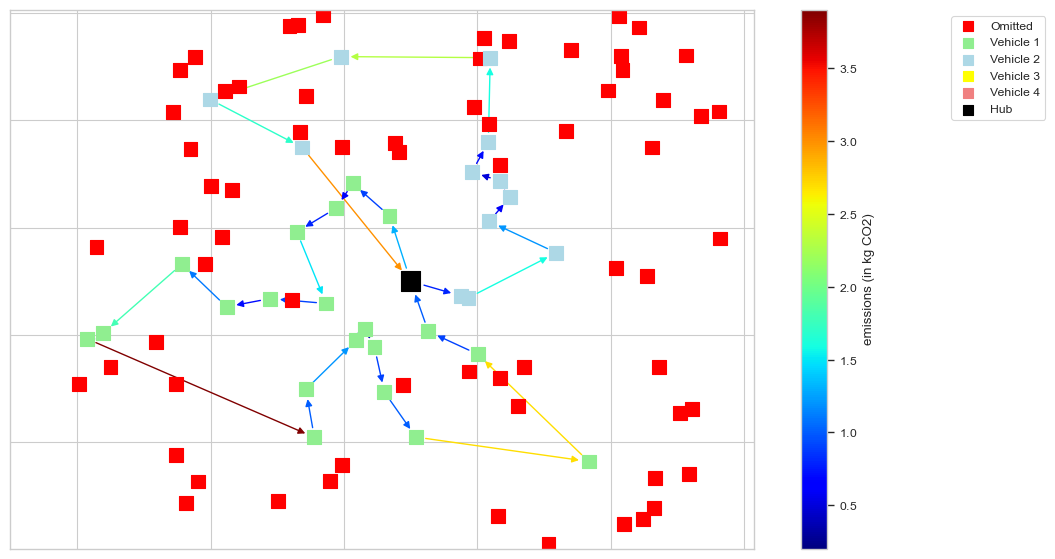

{'assignment': array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
        0, 2, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1,
        2, 0, 2, 2, 1, 0, 2, 0, 0, 1, 1, 0]),
 'routes': array([[ 0, 53, 99, 14, 88, 49, 30, 80, 73, 86, 93, 83, 69, 25, 40, 70,
         52, 76, 98, 27, 54,  0],
        [ 0,  5, 13, 95, 43, 65, 62, 46, 89, 92, 84, 91, 57,  0,  0,  0,
          0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'distance per vehicle': array([259., 168.,   0.,   0.]),
 'emissions per vehicle': array([25.9, 16.8,  0. ,  0. ]),
 'omitted': array([465, 403, 243, 467, 330, 406,  55,  41, 481, 119, 224, 352, 264,
   

In [43]:
episode_r = 0

env.reset(scenario)
for i in range(len(res_MSA['actions'][scenario])):
    o, r, d, trun, info = env.step(res_MSA['actions'][scenario][i])
    episode_r+=r
    # rewards_VA[scenario] += r
    if d or trun:
        break
    
print("reward : ", episode_r)
env.render(display_current_node=False, display_unactivated=False)
info

reward :  40.0
reward in tests :  40.0


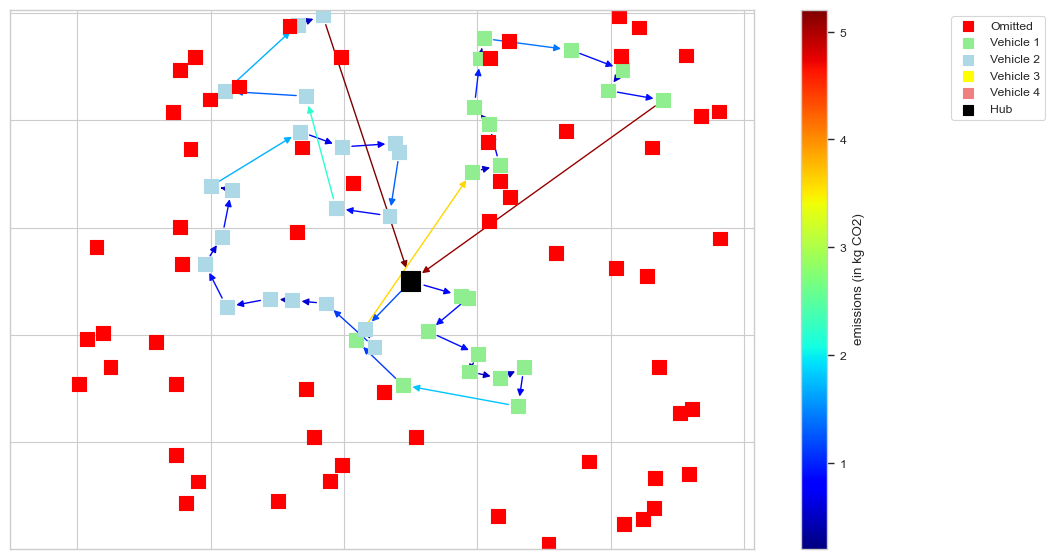

{'omitted': array([465, 406,  41, 264,  63, 289, 263, 276,  40, 422,   3, 463, 373,
        172, 291,   8,  21, 437,  49, 355,  99, 371, 120, 294, 240, 386,
        497, 426, 393,  83, 321, 439, 444,  66,  52, 192, 483,  17, 203,
        187, 173, 366, 297, 242, 177, 446, 364, 296, 334,  88, 142, 411,
        285, 322, 340,  59,   5, 131, 458]),
 'remained_quota': np.float64(2.8999999999999986),
 'episode rewards': np.float64(40.0),
 'quantity accepted': np.float64(40.0),
 'remained capacity': np.float64(40.0),
 'h': 99,
 't': 99,
 'dest': np.int64(458),
 'assignment': array([0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2,
        2, 2, 1, 1, 1, 2, 1, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0,
        2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'j': 0,
 'quantity demanded': np.float64(1.0),
 'distance per vehicle': array([234

In [44]:
# RL VA
env_configs_VA = deepcopy(env_configs)
env_configs_VA['vehicle_assignment'] = True
env_configs_VA['re_optimization'] = False
env = DynamicQVRPEnv(**env_configs_VA)
# rewards_VA = np.zeros(100)
episode_r = 0

# for scenario in range(100):
env.reset(scenario)
for i in range(len(res_RL_VA['actions'][scenario])):
    o, r, d, trun, info = env.step(res_RL_VA['actions'][scenario][i])
    episode_r+=r
    # rewards_VA[scenario] += r
    if d or trun:
        break
    
print("reward : ", episode_r)
print("reward in tests : ", res_RL_VA['rs'][scenario])
env.render(display_current_node=False, display_unactivated=False)
info

## Clustered data

### Plots

{'horizon': 50, 'Q': 100, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'costs_KM': [1, 1], 'emissions_KM': [0.1, 0.3], 'cluster_scenario': True, 'test': True}


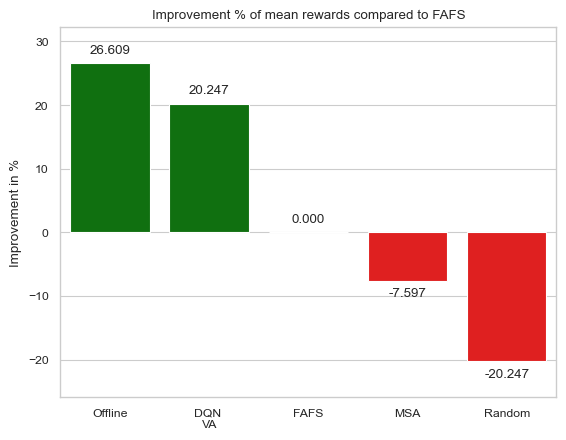

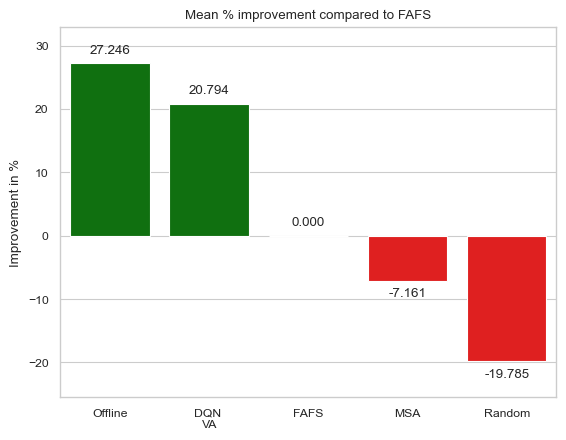

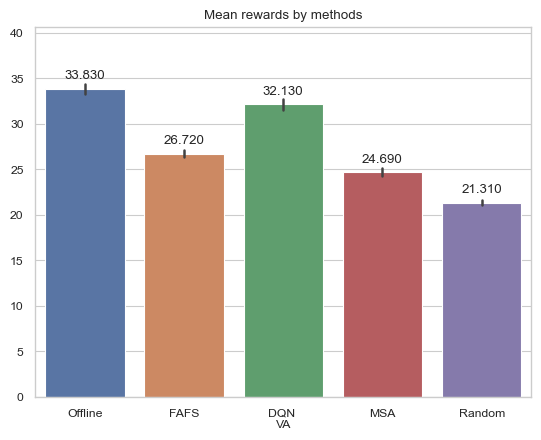

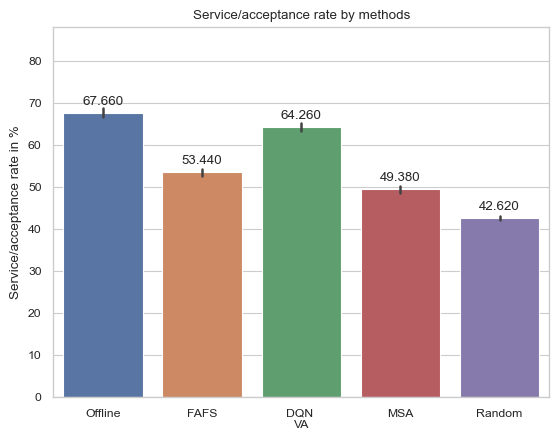

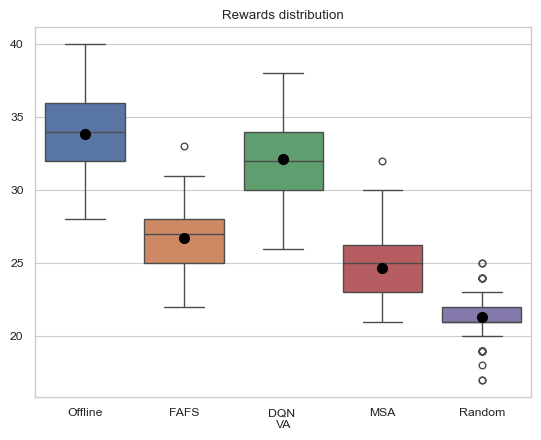

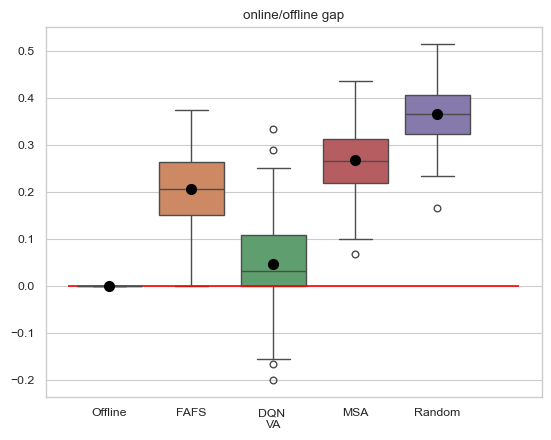

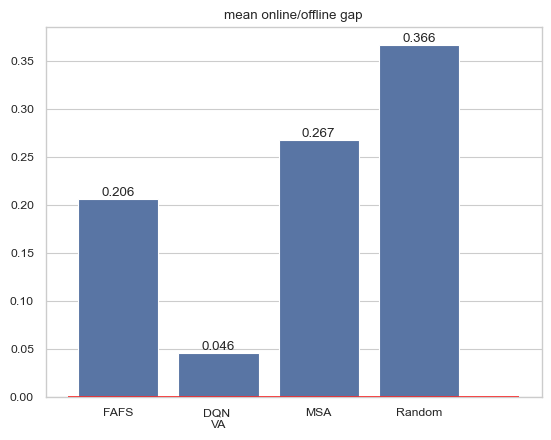

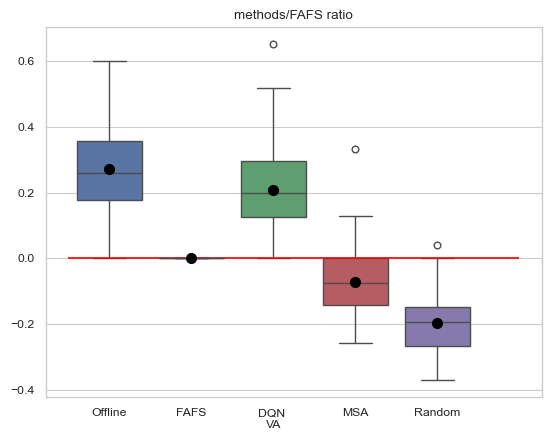

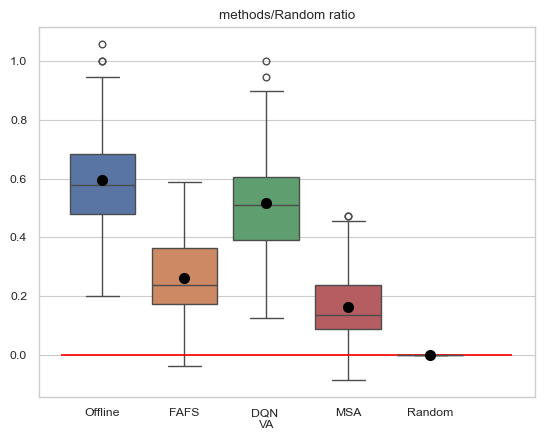

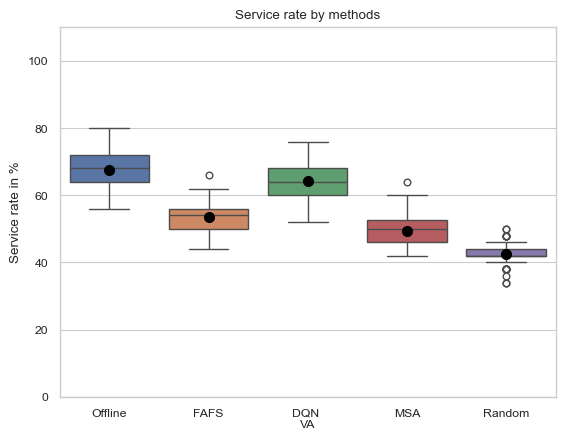

In [6]:
import pickle

wo = 'woReOpt'
w = 'wReOpt'
file = "res_VRP2_DoD100_Q100_cluster"

with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)

with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)
    

with open(f'results/{file}/{w}/res_RL_DQN_OA.pkl', "rb") as f:
    res_RL = pickle.load(f)
    

with open(f'results/{file}/{w}/res_fafs.pkl', "rb") as f:
    res_greedy = pickle.load(f)
    
with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)

    
with open(f'results/{file}/{w}/res_RL_DQN_VA_as_OA.pkl', "rb") as f:
    res_RL_VAasOA = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_RL_DQN_VA.pkl', "rb") as f:
    res_RL_VA = pickle.load(f)

# with open(f'results/{file}/{w}/res_MSA.pkl', "rb") as f:
#     res_MSA = pickle.load(f)
    
with open(f'results/{file}/{w}/res_MSA copy.pkl', "rb") as f:
    res_MSA = pickle.load(f)

# with open(f'results/{file}/{w}/res_MSA copy 2.pkl', "rb") as f:
#     res_MSA3 = pickle.load(f)
    
with open(f'results/{file}/{w}/res_MSA_softmax.pkl', "rb") as f:
    res_MSA_soft = pickle.load(f)
    
data = {
    "Offline" : res_offline['rs'],
    "FAFS" : res_greedy['rs'],
    # "Greedy \nw/o ReOpt" : res_greedy_wo['rs'],
    # "SL" : res_SL['rs'],
    "DQN \nVA" : res_RL_VA['rs'],
    # "DQN \nVA as OA" : res_RL_VAasOA['rs'],
    # "DQN \nVA as OA" : res_RL_VAasOA['rs'],
    # "DQN VA uni" : res_RL_wo_uni['rs'],
    # "DQN VA uni2" : res_RL_wo_uniuni['rs'],
    # "DQN \nOA" : res_RL['rs'],
    # "DQN OA uni" : res_RL_uni['rs'],
    # "MSA" : res_MSA['rs'],
    "MSA" : res_MSA['rs'],
    # "MSA \nn51" : res_MSA_H50['rs'],
    # "MSA \nn101" : res_MSA3['rs'],
    # "MSA Softmax" : res_MSA_soft['rs'],
    # "MSA wo" : res_MSA_wo['rs'], # w/o ReOpt
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
    # "Random \nw/o ReOpt" : res_random_wo['rs'],
}

sns.color_palette("deep")
plot(data, 
     total_cap=env_configs["vehicle_capacity"]*4,
     H=env_configs["horizon"]
     )

### Routes

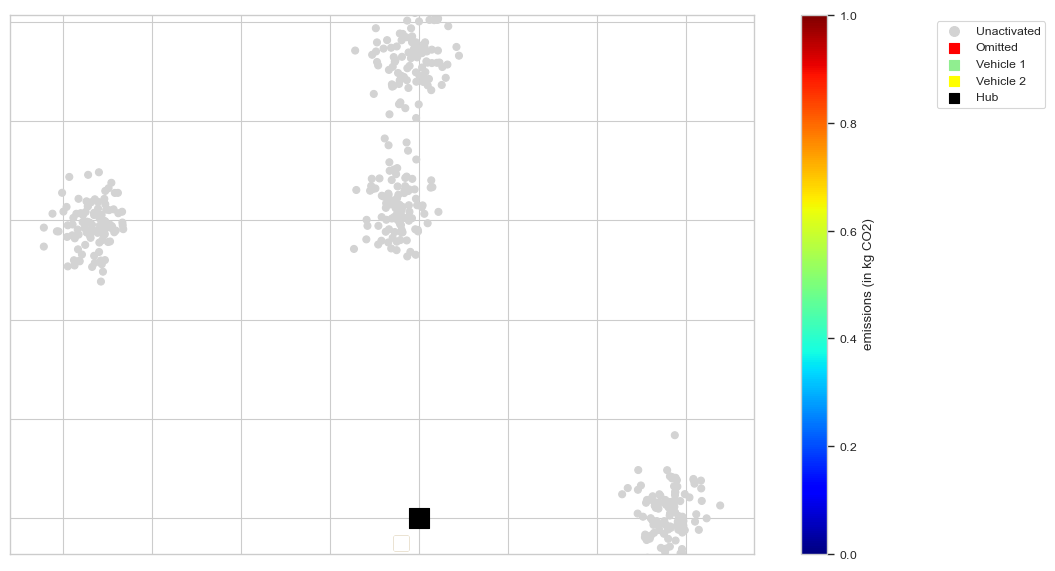

{'horizon': 50,
 'Q': 100,
 'DoD': 1.0,
 'vehicle_capacity': 20,
 're_optimization': True,
 'costs_KM': [1, 1],
 'emissions_KM': [0.1, 0.3],
 'cluster_scenario': True,
 'test': True,
 'vehicle_assignment': False}

In [7]:
from envs import DynamicQVRPEnv
scenario = 17

env_configs['vehicle_assignment'] = False
env = DynamicQVRPEnv(**env_configs)
env.reset(scenario)
env.render(display_current_node=False)
env_configs

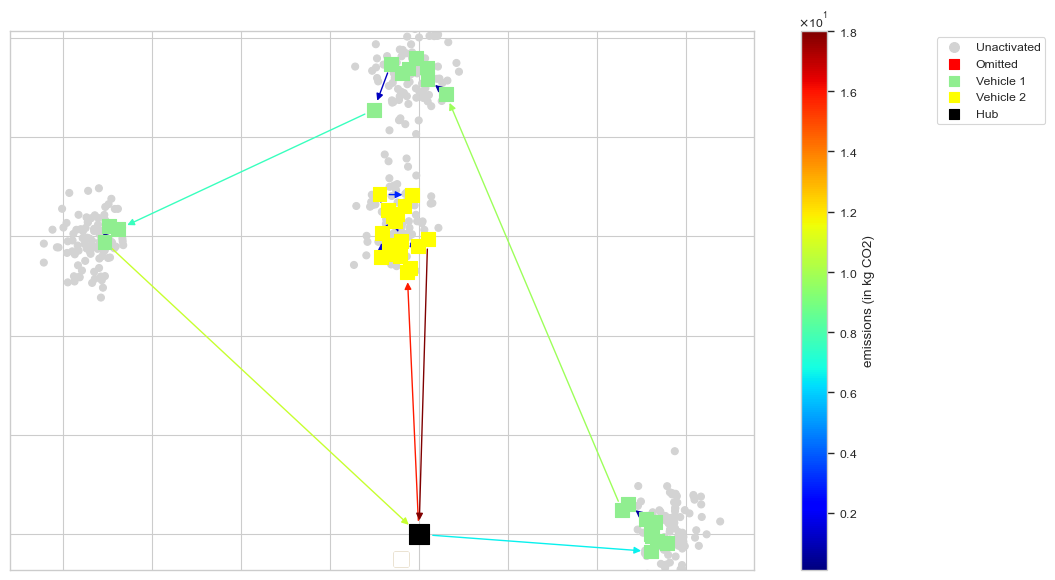

reward :  37


{'assignment': array([0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 2, 1,
        0, 1, 2, 0, 1, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 2, 2,
        0, 0, 2, 2, 2, 1]),
 'routes': array([[ 0, 16, 24, 41,  7,  2, 15, 33, 50,  4, 38, 11, 36, 28, 12,  8,
         22, 18, 27, 40, 39,  0],
        [ 0, 25, 30, 49,  3, 17, 34, 42,  9, 43, 48, 31, 47, 21, 10, 35,
         19, 44,  0,  0,  0,  0]]),
 'distance per vehicle': array([414., 177.]),
 'emissions per vehicle': array([41.4, 53.1]),
 'omitted': array([ 0,  4,  5, 12, 13, 19, 22, 25, 28, 31, 36, 44, 45]),
 'remained_quota': np.float64(5.5)}

In [8]:
env.reset(scenario)
i = 0

env.assignment, env.routes, env.info = env.offline_solution()
# for i in range(len(res_offline['actions'][scenario])):
#     o, _, d, trun, info = env.step(res_offline['actions'][scenario][i])
#     i+=1
#     if d or trun:
#         break

env.render(display_current_node=False)
print("reward : ", np.sum(env.assignment.astype(bool)))
env.info

reward :  28.0


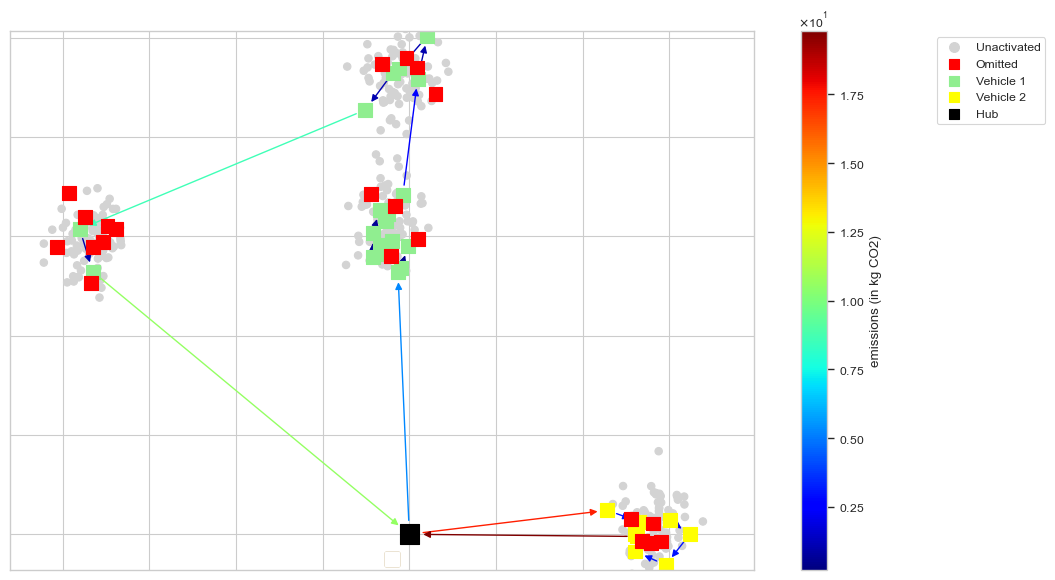

{'assignment': array([2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 0]),
 'routes': array([[ 0, 25, 30, 19, 35,  3, 17, 34, 42, 43,  9, 10, 21, 31, 11,  6,
         12,  8, 18, 14, 20,  0],
        [ 0,  4, 15,  1,  5, 13, 16,  2,  7,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'distance per vehicle': array([359., 175.]),
 'emissions per vehicle': array([35.9, 52.5]),
 'omitted': array([382, 133,  83,  98, 200, 340, 148, 161,  54, 387,  24, 371, 139,
        160,  41, 226, 156, 158, 283, 248, 229]),
 'remained_quota': np.float64(11.599999999999994),
 'episode rewards': np.float64(28.0),
 'quantity accepted': np.float64(28.0),
 'remained capacity': np.float64(12.0),
 'h': 49,
 't': 49,
 'quantity demanded': np.float64(1.0),
 'dest': np.int64(229)}

In [9]:
env.reset(scenario)
episode_r = 0
while True:
    o, r, d, trun, info = env.step(1)
    episode_r+=r
    if d or trun:
        break
print("reward : ", episode_r)
env.render(display_current_node=False)
info

In [43]:
# rewards_FAFS = np.zeros(100)
# for scenario in range(100):
#     env.reset(scenario)
#     while True:
#         o, r, d, trun, info = env.step(1)
#         rewards_FAFS[scenario] += r
#         if d or trun:
#             break

# env.render(display_current_node=False)
# info

reward :  26.0


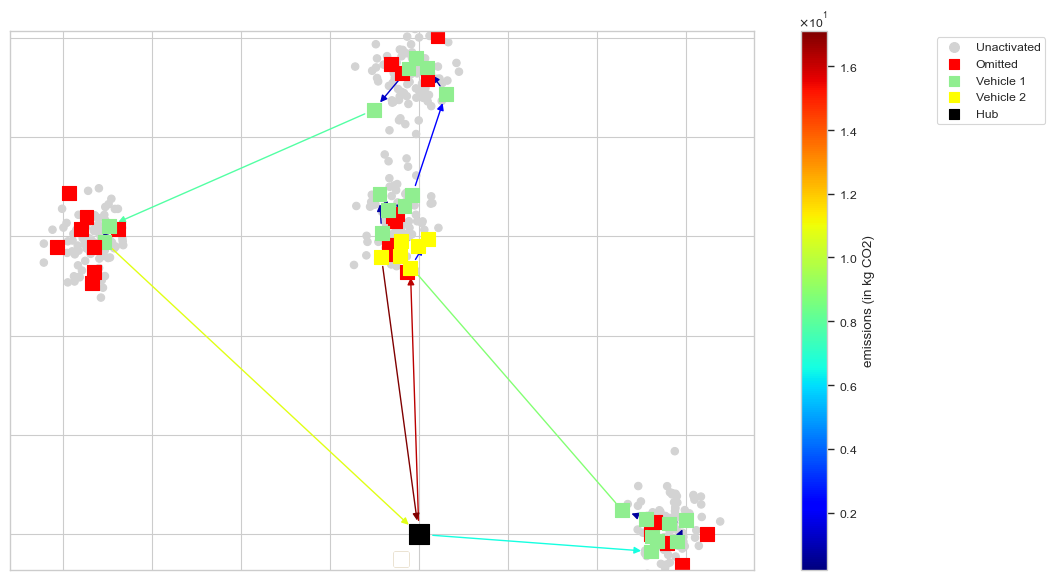

{'assignment': array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        0, 0, 1, 1, 2, 0]),
 'routes': array([[ 0, 16,  7, 41, 37,  1, 26, 33,  4, 42, 48, 43, 47, 31, 38, 36,
         28, 12, 18, 40, 39,  0],
        [ 0, 30, 44, 19, 35, 49, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0]]),
 'distance per vehicle': array([453., 138.]),
 'emissions per vehicle': array([45.3, 41.4]),
 'omitted': array([ 81, 300,  13, 308, 331, 289, 284, 354,  27, 193,  80, 278, 183,
        221, 382, 133,  83, 237, 200, 148, 161, 156, 158]),
 'remained_quota': np.float64(13.300000000000011),
 'episode rewards': np.float64(26.0),
 'quantity accepted': np.float64(26.0),
 'remained capacity': np.float64(14.0),
 'h': 49,
 't': 49,
 'quantity demanded': np.float64(1.0),
 'dest': np.int64(229)}

In [10]:
# rewards_VA = np.zeros(100)
episode_r = 0

# for scenario in range(100):
env.reset(scenario)
for i in range(len(res_MSA['actions'][scenario])):
    o, r, d, trun, info = env.step(res_MSA['actions'][scenario][i])
    episode_r+=r
    # rewards_VA[scenario] += r
    if d or trun:
        break
    
print("reward : ", episode_r)
env.render(display_current_node=False)
info

reward :  32.0


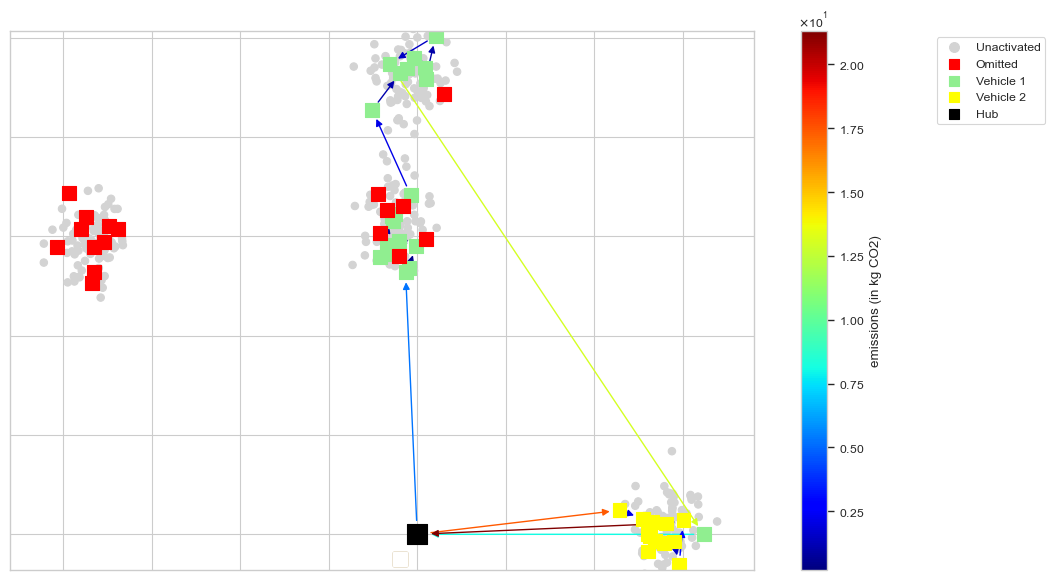

{'omitted': array([193, 183, 133, 200, 148, 161, 371, 139, 160, 297, 247, 226, 156,
        158, 283, 248, 229]),
 'remained_quota': np.float64(9.400000000000006),
 'episode rewards': np.float64(32.0),
 'quantity accepted': np.float64(32.0),
 'remained capacity': np.float64(8.0),
 'h': 49,
 't': 49,
 'dest': np.int64(229),
 'assignment': array([2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1,
        0, 2, 1, 2, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 0, 0, 0, 0]),
 'j': 0,
 'quantity demanded': np.float64(1.0),
 'distance per vehicle': array([375., 177.]),
 'emissions per vehicle': array([37.5, 53.1]),
 'routes': array([[ 0, 25, 30, 19, 35,  3, 17, 34,  9, 10, 21, 31, 18,  8, 12, 28,
         36, 11,  6, 22,  5,  0],
        [ 0,  4, 33, 15,  2,  7, 41, 16, 24, 37, 13,  1, 26,  0,  0,  0,
          0,  0,  0,  0,  0,  0]])}

In [11]:
from copy import deepcopy
env_configs_VA = deepcopy(env_configs)
env_configs_VA['vehicle_assignment'] = True
env_configs_VA['re_optimization'] = False
env = DynamicQVRPEnv(**env_configs_VA)
# rewards_VA = np.zeros(100)
episode_r = 0

# for scenario in range(100):
env.reset(scenario)
for i in range(len(res_RL_VA['actions'][scenario])):
    o, r, d, trun, info = env.step(res_RL_VA['actions'][scenario][i])
    episode_r+=r
    # rewards_VA[scenario] += r
    if d or trun:
        break
    
print("reward : ", episode_r)
env.render(display_current_node=False)
info

## Different quantities

### Plots

{'horizon': 100, 'Q': 50, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'emissions_KM': [0.1, 0.1, 0.3, 0.3], 'different_quantities': True, 'test': True}


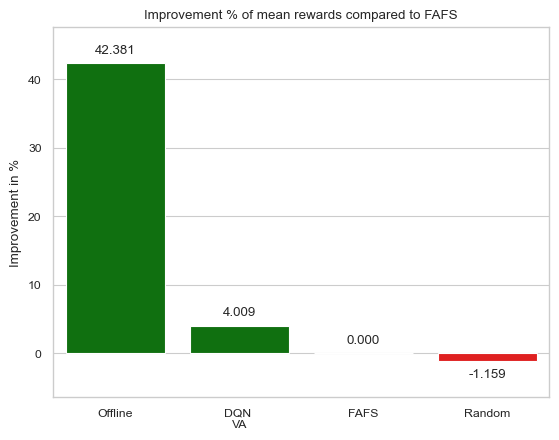

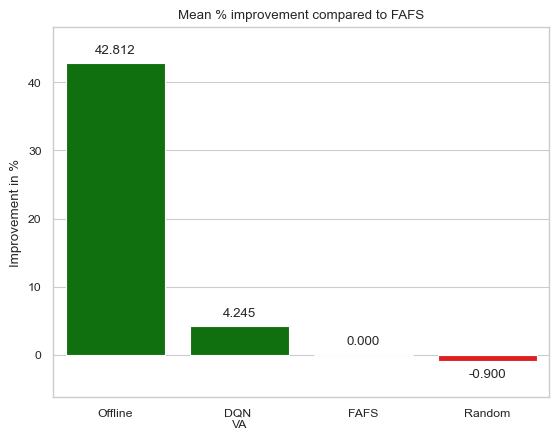

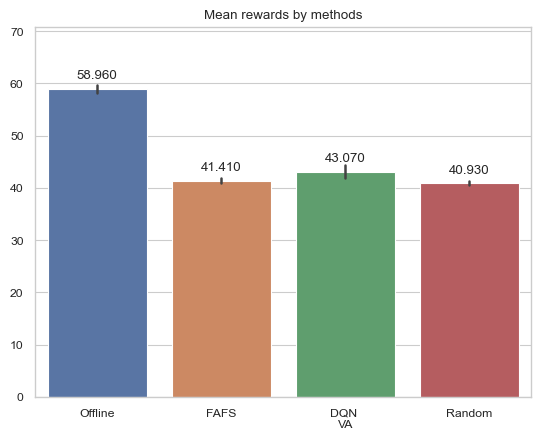

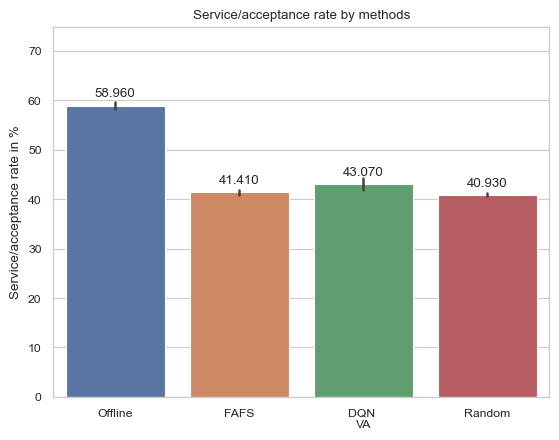

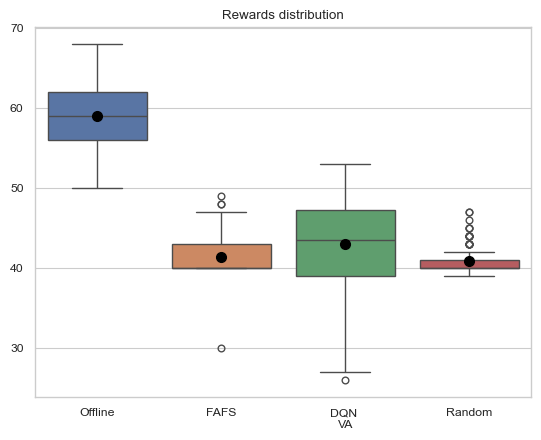

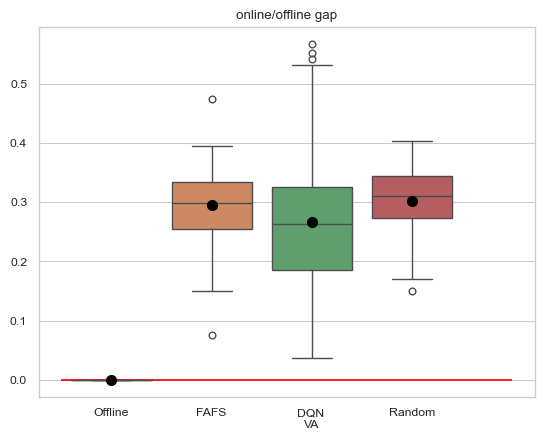

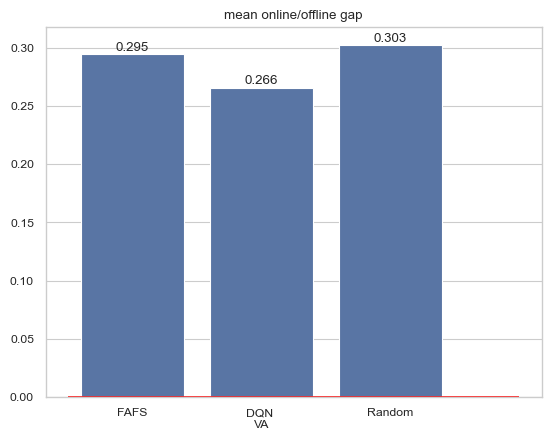

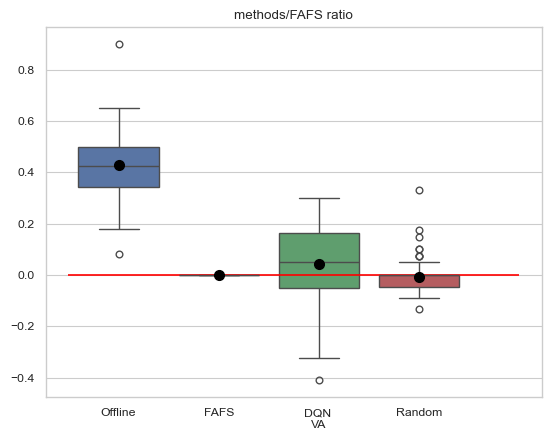

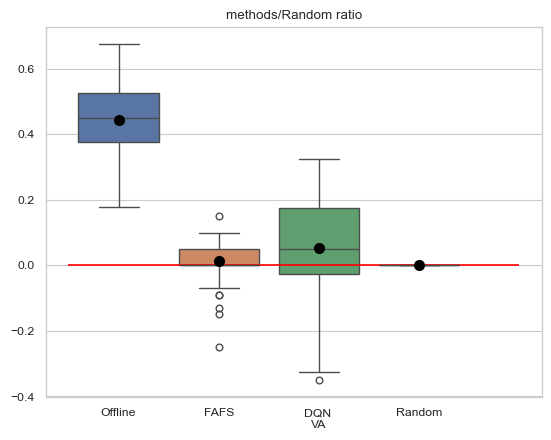

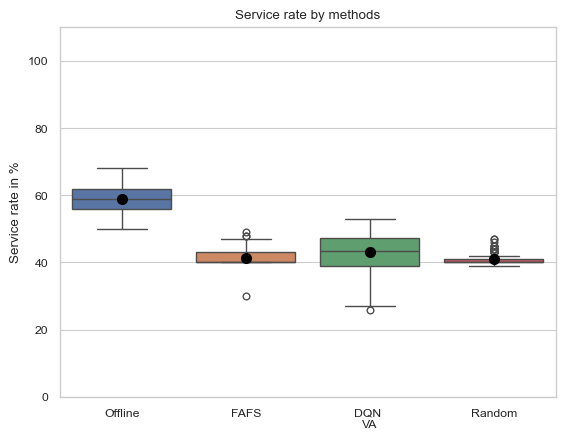

In [12]:
import pickle

wo = 'woReOpt'
w = 'wReOpt'
file = "res_VRP4_DoD100_Q50_different_quantities"

with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)

with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)
    

# with open(f'results/{file}/{w}/res_RL_DQN_OA.pkl', "rb") as f:
#     res_RL = pickle.load(f)
    

with open(f'results/{file}/{w}/res_fafs.pkl', "rb") as f:
    res_greedy = pickle.load(f)
    
with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)

    
# with open(f'results/{file}/{w}/res_RL_DQN_VA_as_OA.pkl', "rb") as f:
#     res_RL_VAasOA = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_RL_DQN_VA.pkl', "rb") as f:
    res_RL_VA = pickle.load(f)
    
    
# with open(f'results/{file}/{wo}/res_RL_DQN_VA2.pkl', "rb") as f:
#     res_RL_VA2 = pickle.load(f)


# with open(f'results/{file}/{w}/res_MSA.pkl', "rb") as f:
#     res_MSA = pickle.load(f)
# with open(f'results/{file}/{w}/res_MSA_softmax.pkl', "rb") as f:
#     res_MSA_soft = pickle.load(f)
    
data = {
    "Offline" : res_offline['rs'],
    "FAFS" : res_greedy['rs'],
    # "Greedy \nw/o ReOpt" : res_greedy_wo['rs'],
    # "SL" : res_SL['rs'],
    # "DQN \nVA" : res_RL_VA['rs'],
    "DQN \nVA" : res_RL_VA['rs'],
    # "DQN \nVA as OA" : res_RL_VAasOA['rs'],
    # "DQN \nVA as OA" : res_RL_VAasOA2['rs'],
    # "DQN VA uni" : res_RL_wo_uni['rs'],
    # "DQN VA uni2" : res_RL_wo_uniuni['rs'],
    # "DQN \nOA" : res_RL['rs'],
    # "DQN OA uni" : res_RL_uni['rs'],
    # "MSA" : res_MSA['rs'],
    # "MSA Softmax" : res_MSA_soft['rs'],
    # "MSA wo" : res_MSA_wo['rs'], # w/o ReOpt
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
    # "Random \nw/o ReOpt" : res_random_wo['rs'],
}

sns.color_palette("deep")
plot(data, 
    total_cap=env_configs["vehicle_capacity"]*4,
     H=env_configs["horizon"]
)

## Noised probabilities

### Plots

{'horizon': 50, 'Q': 100, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'costs_KM': [1, 1], 'emissions_KM': [0.1, 0.3], 'test': True, 'noised_p': True}


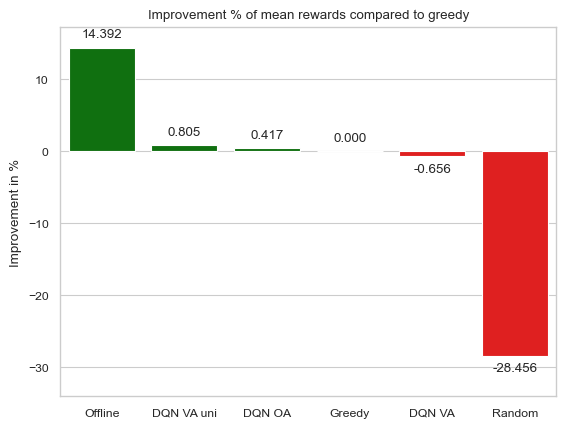

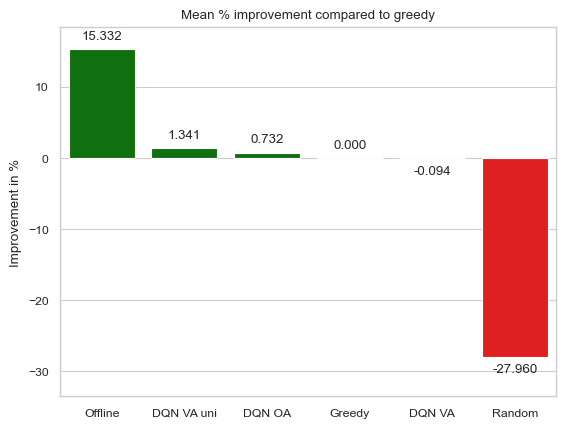

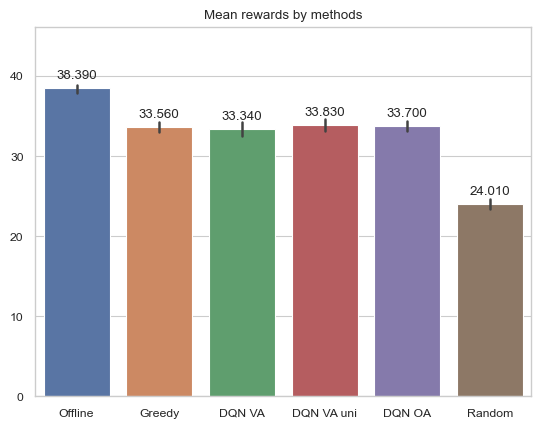

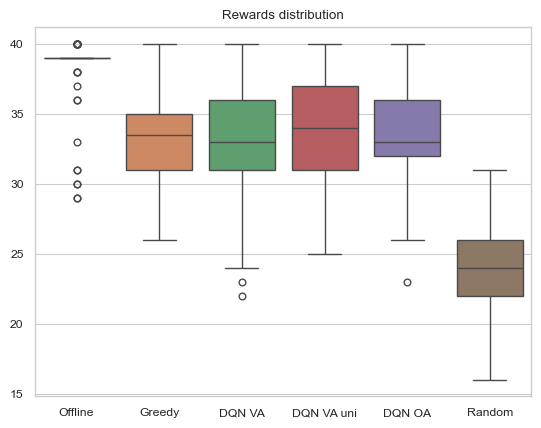

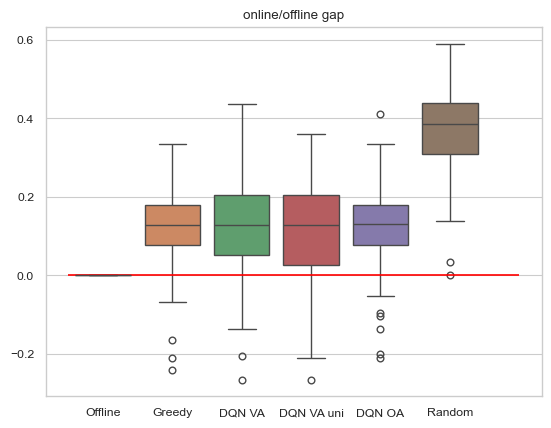

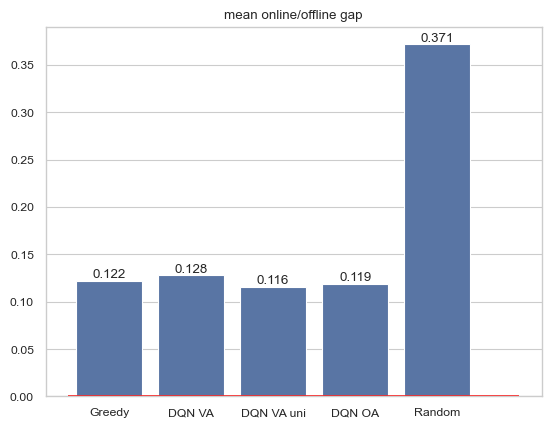

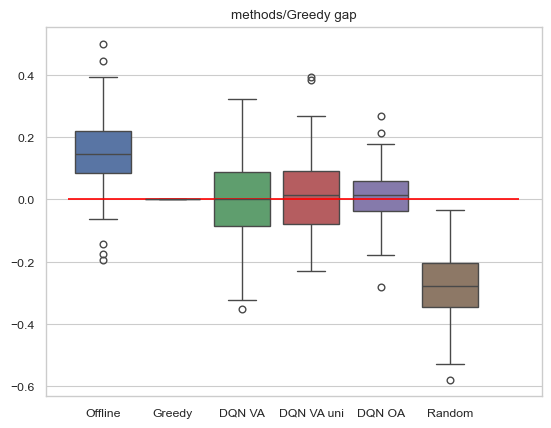

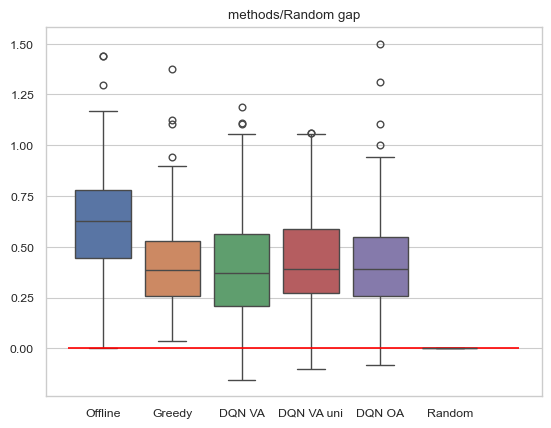

In [66]:
import pickle

wo = 'woReOpt'
w = 'wReOpt'
# file = "res_woReOpt_500"
# file = "res_clusters_test"
file = "res_VRP_DoD100_Q100_noised"

# file = "res_VRP_fullDyn"
# file = "res_wReOpt_500"
# file = "res_TSP"
# file = "res_TSP_fullDynamic"
with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)

with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)

with open(f'results/{file}/{w}/res_RL_DQN_OA.pkl', "rb") as f:
    res_RL = pickle.load(f)
    
# with open(f'results/{file}/{w}/res_RL_DQN_OA_uni.pkl', "rb") as f:
#     res_RL_uni = pickle.load(f)
# with open(f'results/{file}/{w}/res_MSA.pkl', "rb") as f:
#     res_MSA = pickle.load(f)

with open(f'results/{file}/{w}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)

with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)
    
    
# with open(f'results/{file}/{wo}/res_greedy.pkl', "rb") as f:
#     res_greedy_wo = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_RL_DQN_VA.pkl', "rb") as f:
    res_RL_wo = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_RL_DQN_VA_uniforme.pkl', "rb") as f:
    res_RL_wo_uni = pickle.load(f)
    
with open(f'results/{file}/{wo}/res_RL_DQN_VA_uniuni.pkl', "rb") as f:
    res_RL_wo_uniuni = pickle.load(f)
    
# with open(f'results/{file}/{wo}/res_MSA.pkl', "rb") as f:
#     res_MSA_wo = pickle.load(f)

# with open(f'results/{file}/{wo}/res_random.pkl', "rb") as f:
#     res_random_wo = pickle.load(f)
    
data = {
    "Offline" : res_offline['rs'],
    "Greedy" : res_greedy['rs'],
    # "Greedy wo" : res_greedy_wo['rs'],
    # "SL" : res_SL['rs'],
    "DQN VA" : res_RL_wo['rs'],
    "DQN VA uni" : res_RL_wo_uni['rs'],
    # "DQN VA uni2" : res_RL_wo_uniuni['rs'],
    "DQN OA" : res_RL['rs'],
    # "DQN OA uni" : res_RL_uni['rs'],
    # "MSA" : res_MSA['rs'],
    # "MSA" : res_MSA['rs'],
    # "MSA wo" : res_MSA_wo['rs'], # w/o ReOpt
    # "DQN u" : res_RL_equiProb['rs'],
    # "RL (PPO)" : res_RL_PPO['rs'], 
    "Random" : res_random['rs'],
    # "Random wo" : res_random_wo['rs'],
}

sns.color_palette("deep")
plot(data)

## Different DoDs

### plots

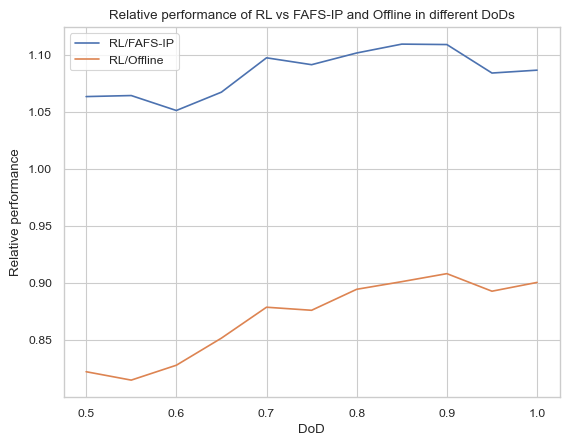

In [3]:
import pickle

file = "res_TSP_DoD100_Q100"

with open(f'results/{file}/wReOpt/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
# print(env_configs)


with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)
    

dods = np.arange(.5, 1.05, .05)#[1., .85, .75, .65, .5]
VA_vs_FAFS = np.zeros(len(dods))
# ci_VA_vs_FAFS = np.zeros(len(dods))
gap = np.zeros(len(dods))
# ci_gap = np.zeros(len(dods))

for i, dod in enumerate(dods):
    
    with open(f'results/DoD{dod:.2f}/res_greedy.pkl', "rb") as f:
        res_greedy = pickle.load(f)
        
    with open(f'results/DoD{dod:.2f}/res_RL_DQN_VA.pkl', "rb") as f:
        res_RL_VA = pickle.load(f)

    # relative = res_RL_VA['rs']/res_greedy['rs']
    VA_vs_FAFS[i] = res_RL_VA['rs'].mean()/res_greedy['rs'].mean()#relative.mean()
    # ci_VA_vs_FAFS[i] = relative.std()
    total_q = np.array([
        np.sum(res_RL_VA['infos'][s][-1]['assignment'])
        for s in range(len(res_RL_VA['infos']))
    ])
    # relative = total_q/res_offline['rs']
    # gap.append(total_q.mean()/res_offline['rs'].mean())
    gap[i] = total_q.mean()/res_offline['rs'].mean()#relative.mean()
    # ci_gap[i] = relative.std()
    
    data = {
        "Offline" : res_offline['rs'],
        "Greedy" : res_greedy['rs'],
        # "Greedy \nw/o ReOpt" : res_greedy_wo['rs'],
        # "SL" : res_SL['rs'],
        "DQN \nVA" : res_RL_VA['rs'],
        # "DQN \nVA as OA" : res_RL_VAasOA['rs'],
        # "DQN VA uni" : res_RL_wo_uni['rs'],
        # "DQN VA uni2" : res_RL_wo_uniuni['rs'],
        # "DQN \nOA" : res_RL['rs'],
        # "DQN OA uni" : res_RL_uni['rs'],
        # "MSA" : res_MSA['rs'],
        # "MSA" : res_MSA['rs'],
        # "MSA wo" : res_MSA_wo['rs'], # w/o ReOpt
        # "DQN u" : res_RL_equiProb['rs'],
        # "RL (PPO)" : res_RL_PPO['rs'], 
        # "Random" : res_random['rs'],
        # "Random \nw/o ReOpt" : res_random_wo['rs'],
    }

    # sns.color_palette("deep")
    # print(dod)
    # plot_mean_rewards(data)
    # plot(data, total_cap=env_configs["vehicle_capacity"]*len(env_configs["emissions_KM"]))
plt.plot(dods, VA_vs_FAFS, label = 'RL/FAFS-IP')
# plt.fill_between(
#     dods, 
#     VA_vs_FAFS - 2*ci_VA_vs_FAFS, 
#     VA_vs_FAFS + 2*ci_VA_vs_FAFS, 
#     alpha=0.2,
#     label = "95% ci")

plt.plot(dods, gap, label = 'RL/Offline')
# plt.fill_between(
#     dods, 
#     gap - 2*ci_gap, 
#     gap + 2*ci_gap, 
#     alpha=0.2,
#     label = "95% ci")

plt.title('Relative performance of RL vs FAFS-IP and Offline in different DoDs')
plt.xlabel('DoD')
plt.ylabel('Relative performance')
plt.legend()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

### Routes

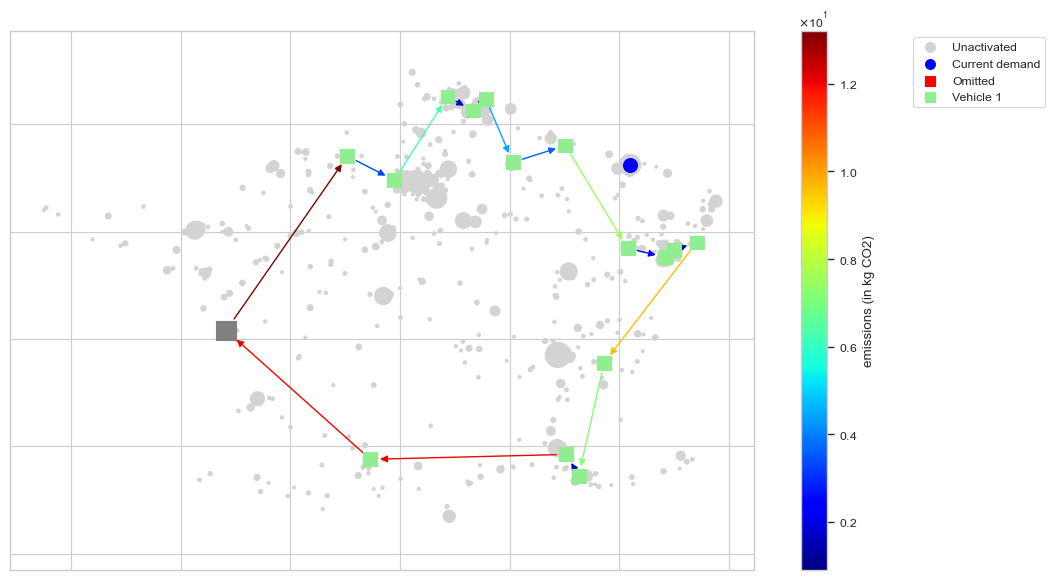

'\\documentclass{report}\n\\usepackage{tikz}\n\\usepackage{subcaption}\n\n\\begin{document}\n\\begin{figure}\n  \\begin{tikzpicture}\n      \\draw\n        (-1.173, 46.162) node[gray] (0){0}\n        (4.06, 49.296) node[lightgreen] (1){1}\n        (3.326, 50.26) node[lightgreen] (2){2}\n        (2.867, 50.52) node[lightgreen] (3){3}\n        (1.897, 48.96) node[lightgreen] (4){4}\n        (1.04, 49.41) node[lightgreen] (5){5}\n        (3.566, 50.474) node[lightgreen] (6){6}\n        (6.155, 47.694) node[lightgreen] (7){7}\n        (5.263, 43.45) node[lightgreen] (8){8}\n        (5.019, 49.607) node[lightgreen] (9){9}\n        (5.036, 43.851) node[lightgreen] (10){10}\n        (6.999, 47.659) node[lightgreen] (11){11}\n        (6.844, 47.523) node[lightgreen] (12){12}\n        (5.724, 45.554) node[lightgreen] (13){13}\n        (1.46, 43.759) node[lightgreen] (14){14}\n        (7.415, 47.799) node[lightgreen] (15){15};\n      \\begin{scope}[->]\n        \\draw (0) to (5);\n        \\draw

In [7]:
from envs import DynamicQVRPEnv
with open(f'results/DoD0.5/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass

scenario = 0

env = DynamicQVRPEnv(**env_configs)
env.reset(scenario)
env.render()

reward :  9.0


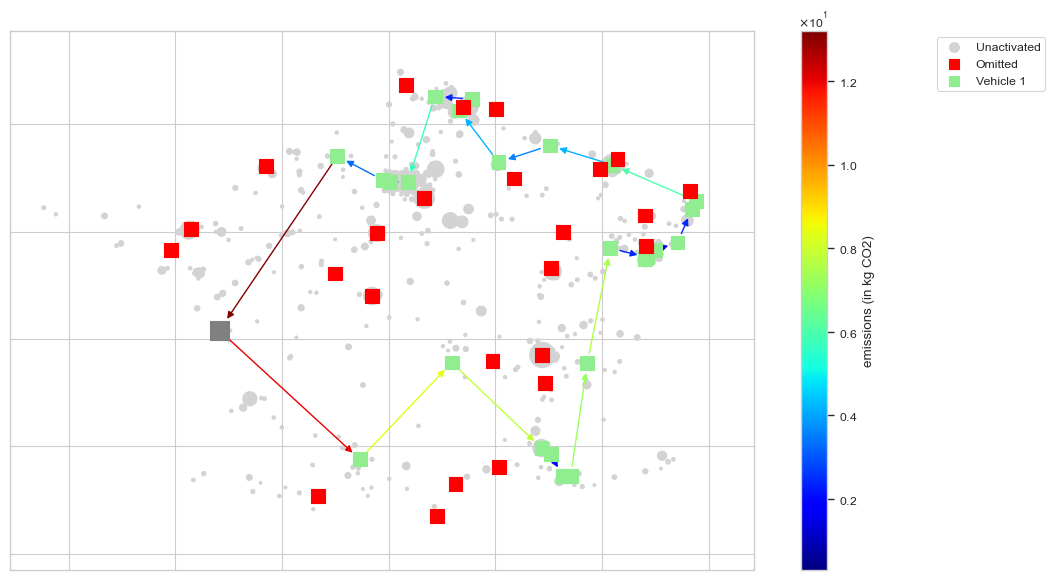

{'assignment': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0]),
 'routes': array([[ 0, 14, 17, 19, 10,  8, 21, 13,  7, 12, 22, 11, 15, 32, 23, 16,
          9,  1,  2,  6,  3, 18, 49,  4,  5,  0,  0,  0,  0,  0,  0,  0]]),
 'distance per vehicle': array([333.]),
 'emissions per vehicle': array([99.9]),
 'omitted': array([424,   2, 484, 194, 495, 453, 292, 401, 465, 319, 178, 352, 451,
        115, 455, 482, 389, 248, 372, 315, 492, 458, 212, 461, 487]),
 'remained_quota': np.float64(0.09999999999999432),
 'episode rewards': np.float64(9.0),
 'quantity accepted': np.float64(24.0),
 'remained capacity': np.float64(6.0),
 'h': 34,
 'j': 49,
 'quantity demanded': np.float64(1.0),
 'dest': np.int64(494)}

In [8]:
env.reset(scenario)
episode_r = 0
while True:
    o, r, d, trun, info = env.step(1)
    episode_r+=r
    if d or trun:
        break
print("reward : ", episode_r)
env.render(display_current_node=False)
info

reward :  9.0
reward in tests :  28.0


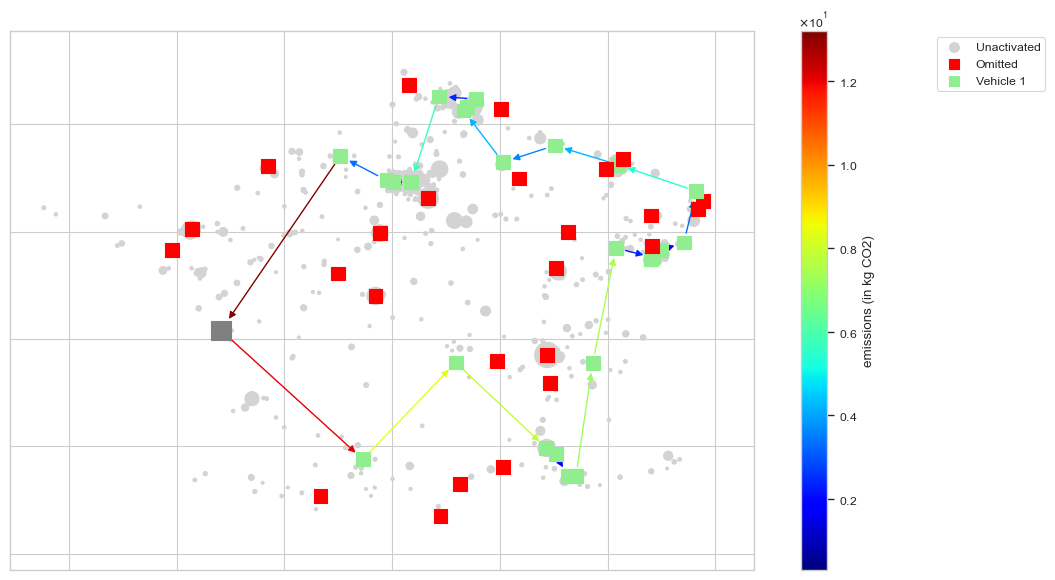

{'assignment': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0]),
 'routes': array([[ 0, 14, 17, 19, 10,  8, 21, 13,  7, 12, 22, 11, 15, 26, 16,  9,
          1,  2, 40,  6,  3, 18, 49,  4,  5,  0,  0,  0,  0,  0,  0,  0]]),
 'distance per vehicle': array([333.]),
 'emissions per vehicle': array([99.9]),
 'omitted': array([424, 467,   2, 484, 495, 453, 292, 401, 465, 367, 319, 178, 352,
        451, 115, 455, 482, 248, 372, 315, 492, 458, 212, 461, 487]),
 'remained_quota': np.float64(0.10000000000000853),
 'episode rewards': np.float64(9.0),
 'quantity accepted': np.float64(24.0),
 'remained capacity': np.float64(6.0),
 'h': 34,
 'j': 49,
 'quantity demanded': np.float64(1.0),
 'dest': np.int64(494)}

In [9]:
env_configs_VA = deepcopy(env_configs)
env_configs_VA['vehicle_assignment'] = True
env_configs_VA['re_optimization'] = False
env = DynamicQVRPEnv(**env_configs_VA)
# rewards_VA = np.zeros(100)
episode_r = 0

# for scenario in range(100):
env.reset(scenario)
for i in range(len(res_RL_VA['actions'][scenario])):
    o, r, d, trun, info = env.step(res_RL_VA['actions'][scenario][i])
    episode_r+=r
    # rewards_VA[scenario] += r
    if d or trun:
        break
    
print("reward : ", episode_r)
print("reward in tests : ", res_RL_VA['rs'][scenario])
env.render(display_current_node=False)
info

## Observation dependance

In [2]:
import pickle

wo = 'woReOpt'
w = 'wReOpt'
file = "res_VRP4_DoD100_Q50"

with open(f'results/{file}/{w}/env_configs.pkl', 'rb') as f:
    env_configs = pickle.load(f)
try:
    env_configs["horizon"] = env_configs["K"]
    env_configs.pop("K")
except:
    pass
print(env_configs)

with open(f'results/{file}/res_offline.pkl', "rb") as f:
    res_offline = pickle.load(f)
    


with open(f'results/{file}/{w}/res_greedy.pkl', "rb") as f:
    res_greedy = pickle.load(f)
    
with open(f'results/{file}/{w}/res_random.pkl', "rb") as f:
    res_random = pickle.load(f)


{'horizon': 100, 'Q': 50, 'DoD': 1.0, 'vehicle_capacity': 20, 're_optimization': True, 'costs_KM': [1, 1, 1, 1], 'emissions_KM': [0.1, 0.1, 0.3, 0.3], 'test': True}


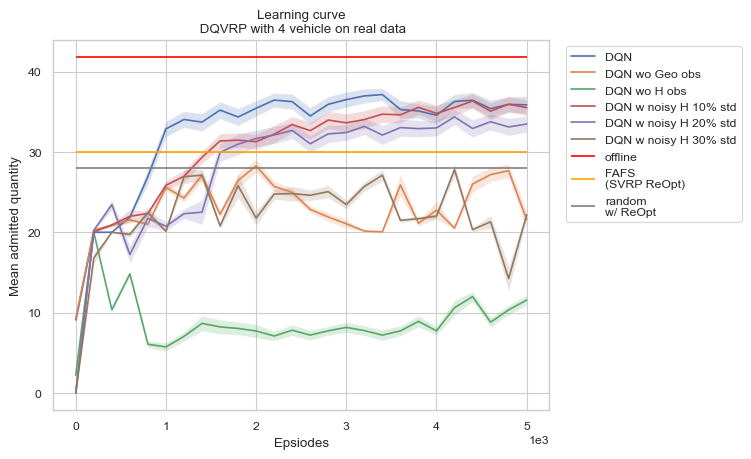

In [16]:
NUM_EPISODES = 5_000
# load results
rs_complete = np.load("results/dqn_VRP4_DoD100_Q50_rs_VA_test.npy")
rs_woGeo = np.load("results/dqn_VRP4_DoD100_Q50_rs_VA_woGeo_test.npy")
rs_woH = np.load("results/dqn_VRP4_DoD100_Q50_rs_VA_woH_test.npy")
rs_noisy01 = np.load("results/dqn_VRP4_DoD100_Q50_rs_VA_noisedH_0.1_test.npy")
rs_noisy02 = np.load("results/dqn_VRP4_DoD100_Q50_rs_VA_noisedH_0.2_test.npy")
rs_noisy03 = np.load("results/dqn_VRP4_DoD100_Q50_rs_VA_noisedH_0.3_test.npy")
eval_every = NUM_EPISODES//(len(rs_complete)-1)

plot_curves(rs_complete, "DQN", eval_every=eval_every)
plot_curves(rs_woGeo, "DQN wo Geo obs", eval_every=eval_every)
plot_curves(rs_woH, "DQN wo H obs", eval_every=eval_every)
plot_curves(rs_noisy01, "DQN w noisy H 10% std", eval_every=eval_every)
plot_curves(rs_noisy02, "DQN w noisy H 20% std", eval_every=eval_every)
plot_curves(rs_noisy03, "DQN w noisy H 30% std", eval_every=eval_every)

# plt.hlines(res_SL["rs"].mean(), 0, eval_every*len(y), 'black', label="SL", linestyles='--')
plt.hlines(res_offline["rs"].mean(), 0, NUM_EPISODES, 'red', label="offline", linestyles='solid')
plt.hlines(res_greedy["rs"].mean(), 0, NUM_EPISODES, 'orange', label="FAFS\n(SVRP ReOpt)", linestyles='solid')
plt.hlines(res_random["rs"].mean(), 0, NUM_EPISODES, 'gray', label="random\nw/ ReOpt", linestyles='solid')


plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
plt.xlabel('Epsiodes')
plt.ylabel('Mean admitted quantity')
plt.title('Learning curve\n DQVRP with 4 vehicle on real data')
# plt.legend()
plt.legend(bbox_to_anchor=(1.4, 1.0), loc='upper right')

plt.show()